# Table of Contents
1. [Traceroute RTT/Hops Bar](#traceroute-rtt-hops-bar)
   1.1 [Number of Measurements per Hop Count](#number-of-measurements)
   1.2 [Average RTT per Hop Count](#average-rtt)


In [2]:
!pip install pandas
!pip install ripe.atlas.cousteau
!pip install matplotlib
!pip install seaborn
import seaborn as sns
import json
import pandas as pd
from ripe.atlas.cousteau import (
    AtlasResultsRequest
)
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


You should consider upgrading via the '/Users/emily/.pyenv/versions/3.9.6/bin/python3.9 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/emily/.pyenv/versions/3.9.6/bin/python3.9 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/emily/.pyenv/versions/3.9.6/bin/python3.9 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/emily/.pyenv/versions/3.9.6/bin/python3.9 -m pip install --upgrade pip' command.


In [3]:
pd.options.display.max_columns = None #make sure all columns are displayed
pd.options.display.max_colwidth = None
pd.options.display.max_rows = None

sns.set_theme(palette="Greys")


[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
[129, 5393, 5226, 2350, 633, 391, 433, 192, 45, 67, 17, 22, 3]
[3301, 5836, 3298, 1316, 603, 106, 262, 114, 27, 29, 8, 1, 0]


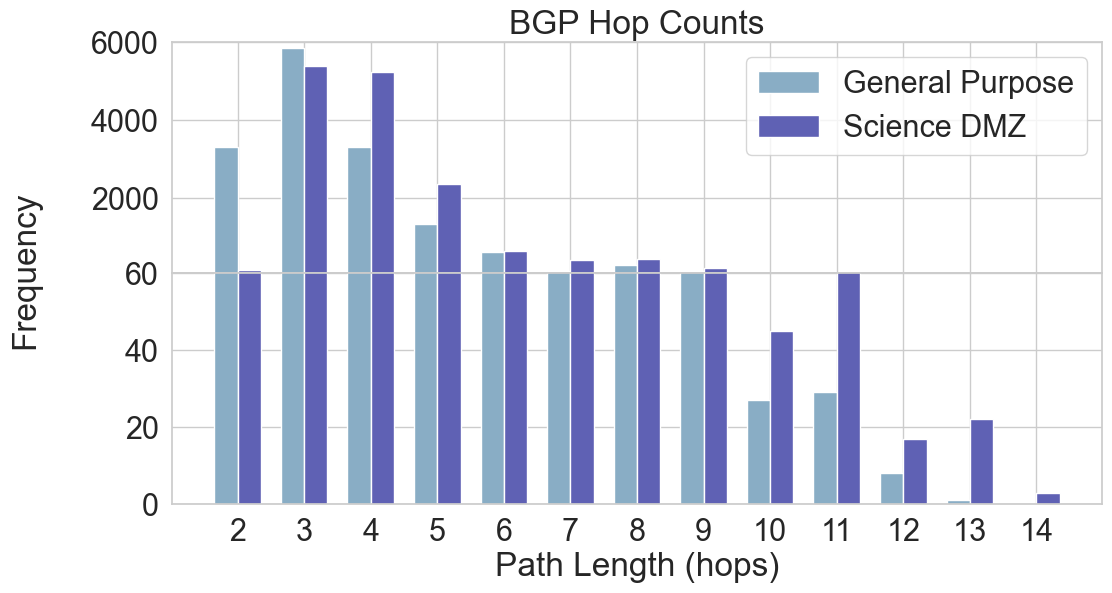

In [47]:
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import LogFormatter

import seaborn as sns
import numpy as np
import re


sns.set(style='whitegrid', font_scale=2, palette="twilight")

with open("hop_count_comparison_between_two_bgp_tables.txt", 'r') as file:
    ip_addresses = []
    ip = ''
    dmz_hops = []
    final_dmz_hops = []
    dmz_count = 0
    campus_hops = []
    final_campus_hops = []
    campus_count = 0
    unique_hops = []
    for line in file:
        match = re.search(r'(\d+\.\d+\.\d+\.\d+\/\d+): (\d+) \(ScienceDMZ\), (\d+) \(GeneralPurpose\)', line)
        if match:
            ip = match.group(1)
            dmz_count = float(match.group(2))
            campus_count = float(match.group(3))
            ip_addresses.append(ip)
            dmz_hops.append(dmz_count)
            campus_hops.append(campus_count)
       
    for count in dmz_hops:
        if count not in unique_hops:
            unique_hops.append(int(count))
    for count in campus_hops:
        if count not in unique_hops:
            unique_hops.append(int(count))
    unique_hops.sort()
    for item in unique_hops:
        hop_count = 0
        for i in range(0, len(dmz_hops)-1):
            if dmz_hops[i] == item:
                hop_count += 1
        final_dmz_hops.append(hop_count)
        hop_count = 0
        for i in range(0, len(campus_hops)-1):
            if campus_hops[i] == item:
                hop_count += 1
        final_campus_hops.append(hop_count)
    print(unique_hops)
    print(final_dmz_hops)
    print(final_campus_hops)

    bar_width = 0.35

# Set the x locations for the groups
x = np.arange(len(unique_hops))

'''
    Plot Hop Count
'''
#plt.figure(figsize=(10, 6))

# Plot bars side by side
f, (ax1, ax2) = plt.subplots(ncols=1, nrows=2, sharex=True, figsize=(12, 6))

ax1.bar(x - bar_width/2, final_campus_hops, width=bar_width, label='General Purpose')
ax1.bar(x + bar_width/2, final_dmz_hops, width=bar_width, label='Science DMZ')
ax2.bar(x - bar_width/2, final_campus_hops, width=bar_width)
ax2.bar(x + bar_width/2, final_dmz_hops, width=bar_width)

# Add labels, title, and legend
ax2.set_xlabel('Path Length (hops)')
ax1.set_title('BGP Hop Counts')
ax1.set_xticks(x, unique_hops)
ax1.legend()

f.text(-0.01, 0.50, "Frequency", va="center", rotation="vertical")

# Set limits and scale for the second y-axis
ax1.set_ylim(60,6000)
ax2.set_ylim(0, 60)
plt.subplots_adjust(wspace=1, hspace=0)
# Add labels, title, and legend


# Show plot
plt.show()


/var/folders/j0/dqmhv9s17ys57ml7jn321p6c0000gn/T/ipykernel_835/3486904293.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_yticklabels(['1.0x$10^4$', '1.0x$10^5$', '2.0x$10^5$'])
/var/folders/j0/dqmhv9s17ys57ml7jn321p6c0000gn/T/ipykernel_835/3486904293.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_yticklabels(['100', '5000', '1.0x$10^4$'])


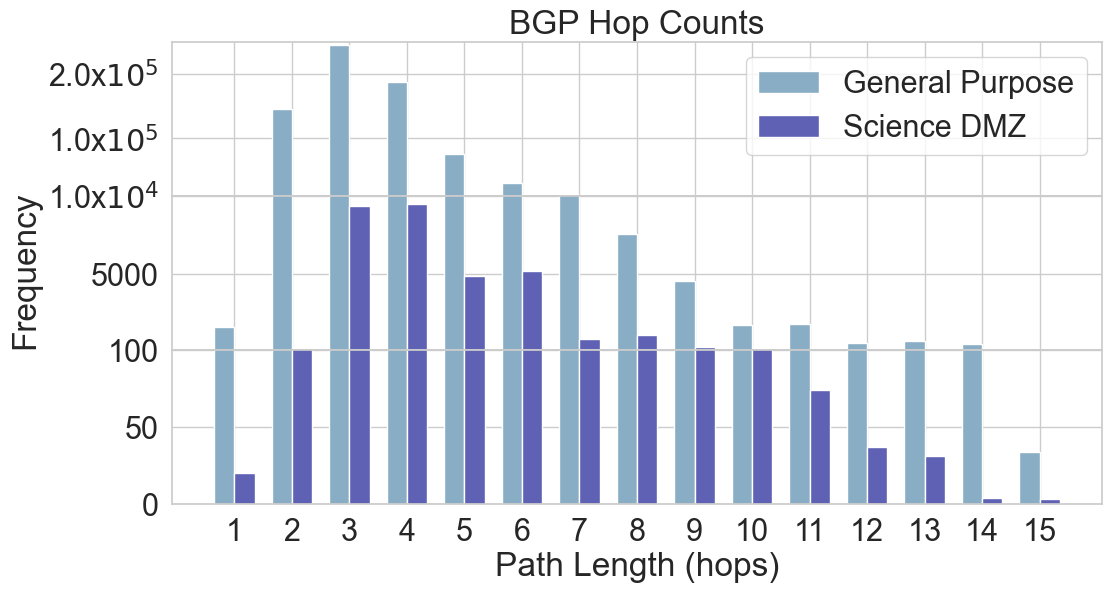

In [21]:
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import LogFormatter

import seaborn as sns
import numpy as np


sns.set(style='whitegrid', font_scale=2, palette="twilight")

# Sample data
labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15']

campus_hops = [1607, 146072, 244767, 188241, 76366, 29752, 11628, 7572, 4522, 1723, 1757, 584, 677, 508, 34]
dmz_hops = [20, 253, 9344, 9497, 4872, 5176, 798, 1096, 271, 109, 74, 37, 31, 4, 3]


# Set the width of the bars
bar_width = 0.35

# Set the x locations for the groups
x = np.arange(len(labels))

'''
    Plot Hop Count
'''
#plt.figure(figsize=(10, 6))

# Plot bars side by side
f, (ax1, ax2, ax3) = plt.subplots(ncols=1, nrows=3, sharex=True, figsize=(12, 6))

ax1.bar(x - bar_width/2, campus_hops, width=bar_width, label='General Purpose')
ax1.bar(x + bar_width/2, dmz_hops, width=bar_width, label='Science DMZ')
ax2.bar(x - bar_width/2, campus_hops, width=bar_width)
ax2.bar(x + bar_width/2, dmz_hops, width=bar_width)
ax3.bar(x - bar_width/2, campus_hops, width=bar_width)
ax3.bar(x + bar_width/2, dmz_hops, width=bar_width)

ax1.set_yticklabels(['1.0x$10^4$', '1.0x$10^5$', '2.0x$10^5$'])
ax2.set_yticklabels(['100', '5000', '1.0x$10^4$'])
# Add labels, title, and legend
ax3.set_xlabel('Path Length (hops)')
ax1.set_title('BGP Hop Counts')
ax1.set_xticks(x, labels)
ax1.legend()

f.text(-0.01, 0.50, "Frequency", va="center", rotation="vertical")

# Set limits and scale for the second y-axis
ax1.set_ylim(10000,250000)
ax2.set_ylim(100, 10000)
ax3.set_ylim(0, 100)
plt.subplots_adjust(wspace=1, hspace=0)
# Add labels, title, and legend


# Show plot
plt.show()

timestamp
2024-02-10    518.0000
2024-02-11    522.5000
2024-02-12    503.0000
2024-02-13    504.5000
2024-02-14    506.5000
2024-02-15    277.1500
2024-02-16     49.9000
2024-02-17     49.9000
2024-02-18     50.6500
2024-02-19     46.1000
2024-02-20     49.6000
2024-02-21     48.3500
2024-02-22     48.5000
2024-02-23     52.3500
2024-02-24     62.4500
2024-02-25     61.1000
2024-02-26     32.0000
2024-02-27     35.3740
2024-02-28     35.4055
2024-02-29     35.1000
2024-03-01     33.6500
2024-03-02     46.7500
2024-03-03     59.9500
Name: receiver_throughput, dtype: float64
timestamp
2024-02-10    513.500
2024-02-11    524.000
2024-02-12    484.000
2024-02-13    493.000
2024-02-14    498.500
2024-02-15    505.500
2024-02-16    502.500
2024-02-17    512.000
2024-02-18    514.000
2024-02-19    493.500
2024-02-20    487.000
2024-02-21    506.000
2024-02-22    489.000
2024-02-23    497.000
2024-02-24    512.500
2024-02-25    517.500
2024-02-26    347.500
2024-02-27    157.415
2024-02-28   

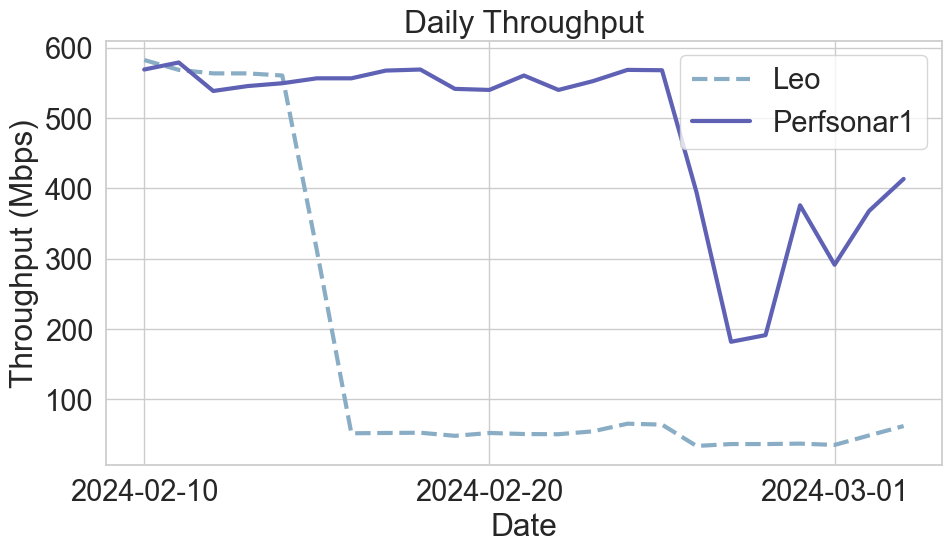

In [14]:

#Iperf3

def plot_ping_rtt(files, start_date):
    plt.figure(figsize=(10, 6))
    path = ["Leo", "Perfsonar1"]
    style = ["dashed", "solid"]
    idx = -1
    for file_path in files:
        idx = idx + 1
        # Read the JSON file
        with open(file_path, 'r') as f:
            data = json.load(f)

        # Create a DataFrame from the JSON data
        df1 = pd.DataFrame(data)
        combined_data = pd.DataFrame()

        # Extract RTT values
        sender_through = []
        receiver_through = []
        sender_throughput = 0
        receiver_throughput = 0
        sender_class = ""
        receiver_class = ""
        timestamps = []

        for x, row in df1.iterrows():
            sender_throughput = row['sender'][0]['bitrate']
            sender_class = row['sender'][0]['bitrate_class']
            receiver_throughput = row['receiver'][0]['bitrate']
            receiver_class = row['receiver'][0]['bitrate_class']
            #if packets_lost < 10:
            if pd.to_datetime(row['timestamp'], unit='s').date() >= start_date and pd.to_datetime(row['timestamp'], unit = 's').date() <= end_date:
                if sender_class == "Mbits/sec":
                    sender_through.append(sender_throughput)
                elif sender_class == "Kbits/sec":
                    sender_throughput = float(sender_throughput / 1000)
                    sender_through.append(sender_throughput)
                elif sender_class == "bits/sec":
                    sender_throughput = float(sender_throughput / 1000000)
                    sender_through.append(sender_throughput)
                elif sender_class == "Gbits/sec":
                    sender_throughput = float(sender_throughput * 1000)
                    sender_through.append(sender_throughput)
                
                if receiver_class == "Mbits/sec":
                    receiver_through.append(receiver_throughput)
                elif receiver_class == "Kbits/sec":
                    receiver_throughput = float(receiver_throughput / 1000)
                    receiver_through.append(receiver_throughput)
                elif receiver_class == "bits/sec":
                    receiver_throughput = float(receiver_throughput / 1000000)
                    receiver_through.append(receiver_throughput)
                elif receiver_class == "Gbits/sec":
                    receiver_throughput = float(receiver_throughput * 1000)
                    receiver_through.append(receiver_throughput)

                timestamps.append(pd.to_datetime(row['timestamp'], unit='s').date())



        # Create a DataFrame with timestamps and packet loss
        #print(sender_through)
        #print(receiver_through)

        data = pd.DataFrame({'timestamp': timestamps, 'sender_throughput': sender_through, 'receiver_throughput': receiver_through})

        # Group by date and calculate the percentage packet loss
        daily_sender = data.groupby('timestamp')['sender_throughput'].sum()
        daily_sender_avg = daily_sender / 2
        daily_receiver = data.groupby('timestamp')['receiver_throughput'].sum()
        daily_receiver_avg = daily_receiver / 2

        # Filter data based on start_date
        filtered_sender_data = daily_sender_avg[daily_sender_avg.index]
        filtered_receiver_data = daily_receiver_avg[daily_receiver_avg.index]
        print(filtered_receiver_data)

        # Plotting the packet loss over time for each file
        sns.set(style='whitegrid', font_scale=1.9, palette="twilight")

        sns.lineplot(x=filtered_sender_data.index, y=filtered_sender_data.values, label=path[idx], linestyle = style[idx], linewidth = 3)

        plt.xlabel('Date')
        plt.ylabel('Throughput (Mbps)')
        plt.title('Daily Throughput')

        # Specify the interval for x-axis labels (e.g., display every 7th label)
        x_ticks_interval = 10
        plt.xticks(filtered_sender_data.index[::x_ticks_interval])

        plt.legend(loc="upper right")  # Add a legend to distinguish files
        plt.tight_layout()  # Adjust plot layout for better spacing
    plt.show()

# List of file paths
files = ['leo_iperf.json', 'pf1_iperf.json']

# Specify the start date from which you want to include data
start_date = pd.to_datetime('2024-02-10').date()
end_date = pd.to_datetime('2024-03-03').date()


# Plot Ping RTT for each file, starting from the specified date
plot_ping_rtt(files, start_date)


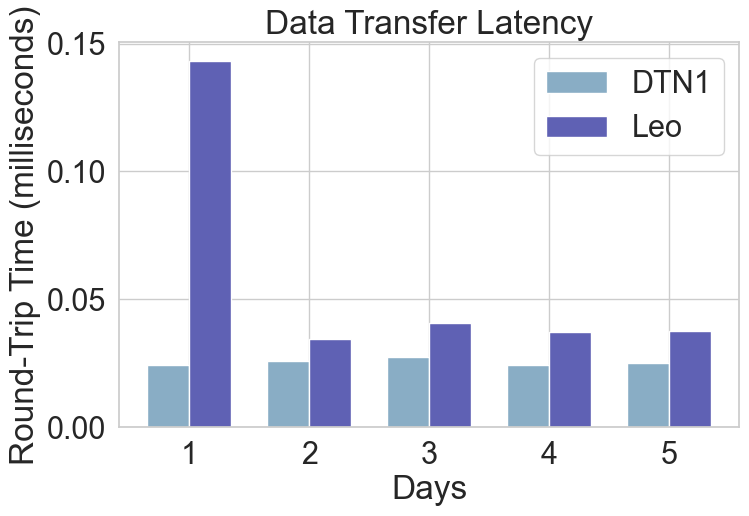

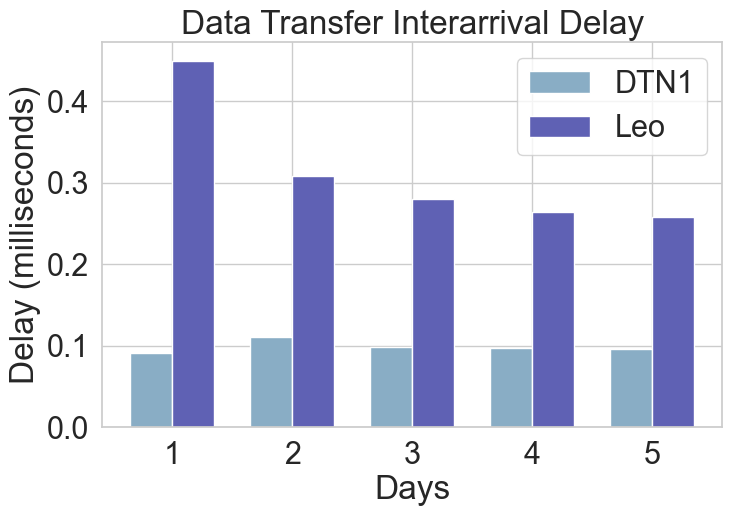

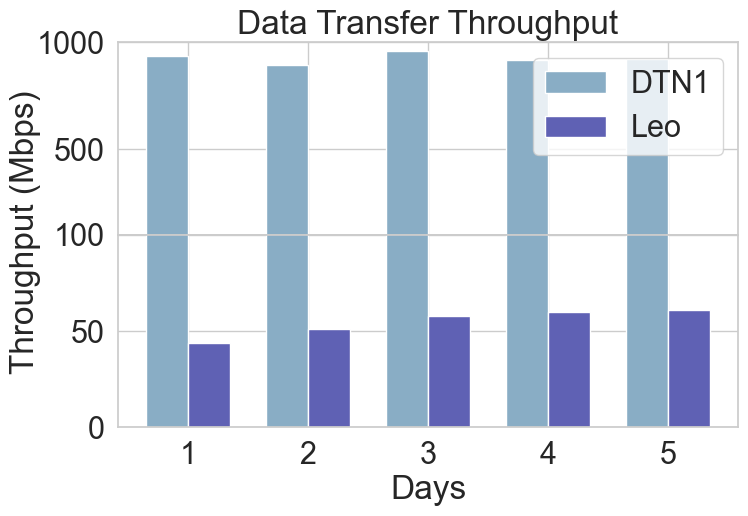

/var/folders/j0/dqmhv9s17ys57ml7jn321p6c0000gn/T/ipykernel_2604/2969002972.py:118: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_yticklabels(['0.0x$10^0$', '1.0x$10^4$', '2.0x$10^4$'])
/var/folders/j0/dqmhv9s17ys57ml7jn321p6c0000gn/T/ipykernel_2604/2969002972.py:119: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_yticklabels(['2.0x$10^4$', '0.5x$10^6$', '1.0x$10^6$'])


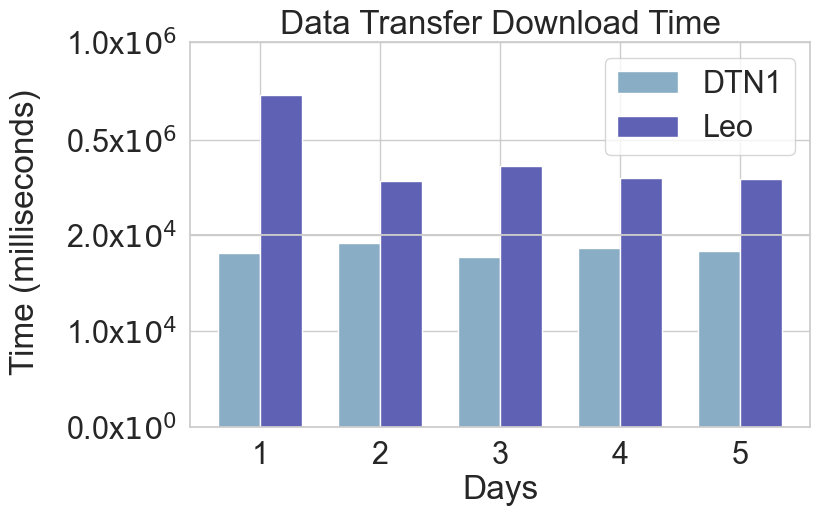

[21755, 188, 188, 10969, 10968]
[10866, 118, 10846, 130, 10876]


/var/folders/j0/dqmhv9s17ys57ml7jn321p6c0000gn/T/ipykernel_2604/2969002972.py:165: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_yticklabels(['0.0x$10^0$', '2.0x$10^2$', '4.0x$10^2$'])
/var/folders/j0/dqmhv9s17ys57ml7jn321p6c0000gn/T/ipykernel_2604/2969002972.py:166: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_yticklabels(['4.0x$10^2$', '1.0x$10^4$', '2.0x$10^4$'])


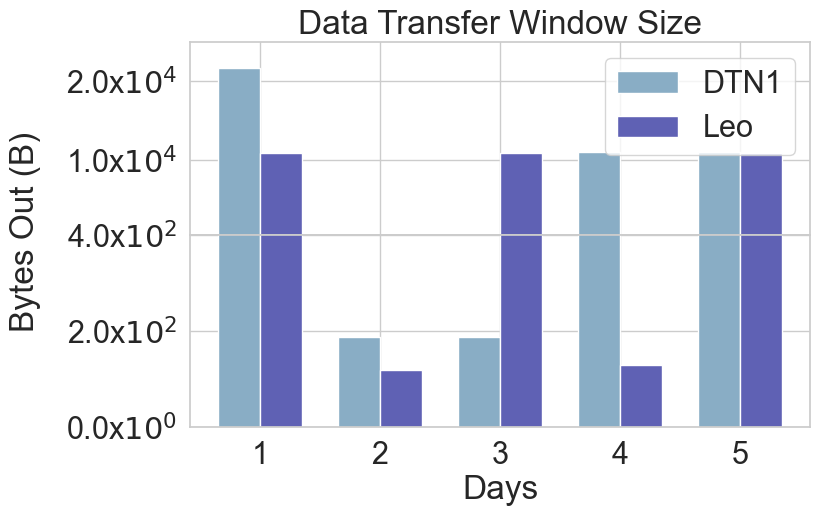

/var/folders/j0/dqmhv9s17ys57ml7jn321p6c0000gn/T/ipykernel_2604/2969002972.py:195: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_yticklabels(['0.0x$10^0$', '0.5x$10^3$', '1.0x$10^3$'])
/var/folders/j0/dqmhv9s17ys57ml7jn321p6c0000gn/T/ipykernel_2604/2969002972.py:196: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_yticklabels(['1.0x$10^3$', '0.5x$10^6$', '1.0x$10^6$'])


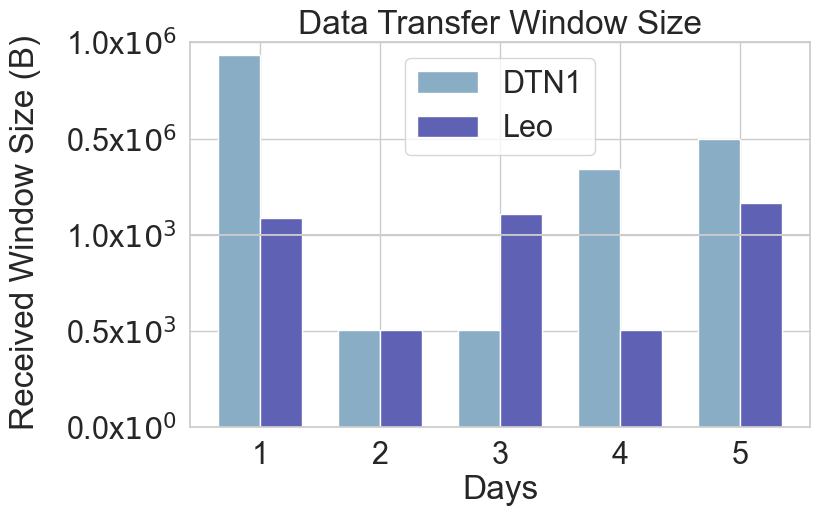

In [5]:
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import LogFormatter

import seaborn as sns
import numpy as np


sns.set(style='whitegrid', font_scale=2, palette="twilight")

# Sample data
labels = ['1', '2', '3', '4', '5']

leo_rtt = [0.14334285, 0.03451216, 0.040621593, 0.03729758, 0.03767707]
dtn_rtt = [0.02432041, 0.02607239, 0.027383813, 0.0243566, 0.024973858]

leo_jitter = [0.449493059, 0.308376884, 0.279623709, 0.263727894, 0.257319788]
dtn_jitter = [0.09056102, 0.110199536, 0.098488429, 0.097166811, 0.095946331]

leo_throughput = [44, 51, 58, 60, 61]
dtn_throughput = [936, 892, 957, 915, 924]

leo_time = [729310.4827, 293382.4342, 367667.0333, 310402.85, 304814.05]
dtn_time = [18059.8065, 19191.94225, 17642.53333, 18578.88333, 18269.93333]

leo_bytes_out = [10866, 118, 10846, 130, 10876]
dtn_bytes_out = [21755, 188, 188, 10969, 10968]

leo_rcvd_wind = [88087, 504, 109419, 504, 165587]
dtn_rcvd_wind = [933671, 507, 507, 342014, 500423]

# Set the width of the bars
bar_width = 0.35

# Set the x locations for the groups
x = np.arange(len(labels))

'''
    Plot RTT
'''
plt.figure(figsize=(8, 5))

# Plot bars side by side
plt.bar(x - bar_width/2, dtn_rtt, width=bar_width, label='DTN1')
plt.bar(x + bar_width/2, leo_rtt, width=bar_width, label='Leo')

# Add labels, title, and legend
plt.xlabel('Days')
plt.ylabel('Round-Trip Time (milliseconds)')
plt.title('Data Transfer Latency')
plt.xticks(x, labels)
plt.legend()

# Show plot
plt.show()


''' 
    Plot Jitter
'''
plt.figure(figsize=(8, 5))

plt.bar(x - bar_width/2, dtn_jitter, width=bar_width, label='DTN1')
plt.bar(x + bar_width/2, leo_jitter, width=bar_width, label='Leo')

# Add labels, title, and legend
plt.xlabel('Days')
plt.ylabel('Delay (milliseconds)')
plt.title('Data Transfer Interarrival Delay')
plt.xticks(x, labels)
plt.legend()

# Show plot
plt.show()

'''
    Plot Throughput
'''

f, (ax1, ax2) = plt.subplots(ncols=1, nrows=2, sharex=True, figsize=(8, 5))

ax1.bar(x - bar_width/2, dtn_throughput, width=bar_width, label='DTN1')
ax1.bar(x + bar_width/2, leo_throughput, width=bar_width, label='Leo')
ax2.bar(x - bar_width/2, dtn_throughput, width=bar_width, label='DTN1')
ax2.bar(x + bar_width/2, leo_throughput, width=bar_width, label='Leo')

ax1.ticklabel_format(style='sci', axis='y')
ax2.ticklabel_format(style='sci', axis='y')

# Add labels, title, and legend
ax2.set_xlabel('Days')
ax1.set_title('Data Transfer Throughput')
ax1.set_xticks(x, labels)
ax1.legend()

f.text(-0.01, 0.50, "Throughput (Mbps)", va="center", rotation="vertical")

# Set limits and scale for the second y-axis
ax1.set_ylim(100, 1000)
ax2.set_ylim(0, 100)
plt.subplots_adjust(wspace=1, hspace=0)

# Show plot
plt.show()


'''
    Plot Download Time
'''

f, (ax1, ax2) = plt.subplots(ncols=1, nrows=2, sharex=True, figsize=(8, 5))

ax1.bar(x - bar_width/2, dtn_time, width=bar_width, label='DTN1')
ax1.bar(x + bar_width/2, leo_time, width=bar_width, label='Leo')
ax2.bar(x - bar_width/2, dtn_time, width=bar_width, label='DTN1')
ax2.bar(x + bar_width/2, leo_time, width=bar_width, label='Leo')

ax2.set_yticklabels(['0.0x$10^0$', '1.0x$10^4$', '2.0x$10^4$'])
ax1.set_yticklabels(['2.0x$10^4$', '0.5x$10^6$', '1.0x$10^6$'])
# Add labels, title, and legend
ax2.set_xlabel('Days')
ax1.set_title('Data Transfer Download Time')
ax1.set_xticks(x, labels)
ax1.legend()

f.text(-0.1, 0.50, "Time (milliseconds)", va="center", rotation="vertical")

# Set limits and scale for the second y-axis
ax1.set_ylim(20000, 1000000)
ax2.set_ylim(0, 20000)
plt.subplots_adjust(wspace=1, hspace=0)

# Show plot
plt.show()


'''
    Plot Bytes Out
'''

f, (ax1, ax2) = plt.subplots(ncols=1, nrows=2, sharex=True, figsize=(8, 5))

ax1.bar(x - bar_width/2, dtn_bytes_out, width=bar_width, label='DTN1')
ax1.bar(x + bar_width/2, leo_bytes_out, width=bar_width, label='Leo')
ax2.bar(x - bar_width/2, dtn_bytes_out, width=bar_width, label='DTN1')
ax2.bar(x + bar_width/2, leo_bytes_out, width=bar_width, label='Leo')

print(dtn_bytes_out)
print(leo_bytes_out)
# formatter = ScalarFormatter(useMathText=True)
# formatter.set_powerlimits((0,0))

# # Apply the formatter to the y-axis
# ax1.yaxis.set_major_formatter(formatter)
# ax2.yaxis.set_major_formatter(formatter)

# # Get the tick values
# ticks = ax1.get_yticks()


# # Convert the tick values to strings in scientific notation
# tick_labels = ['{:.1e}'.format(tick) for tick in ticks]

# # Set the new tick labels
ax2.set_yticklabels(['0.0x$10^0$', '2.0x$10^2$', '4.0x$10^2$'])
ax1.set_yticklabels(['4.0x$10^2$', '1.0x$10^4$', '2.0x$10^4$'])

ax2.set_xlabel('Days')
ax1.set_title('Data Transfer Window Size')
ax1.set_xticks(x, labels)
ax1.legend(loc='upper right')

# Create a second y-axis on the right side
f.text(-0.1, 0.50, "Bytes Out (B)", va="center", rotation="vertical")

# Set limits and scale for the second y-axis
ax1.set_ylim(400, 25000)
ax2.set_ylim(0, 400)
plt.subplots_adjust(wspace=1, hspace=0)
# Show plot
plt.show()

'''
    Plot Rcvd Window Size
'''

f, (ax1, ax2) = plt.subplots(ncols=1, nrows=2, sharex=True, figsize=(8, 5))

ax1.bar(x - bar_width/2, dtn_rcvd_wind, width=bar_width, label='DTN1')
ax1.bar(x + bar_width/2, leo_rcvd_wind, width=bar_width, label='Leo')
ax2.bar(x - bar_width/2, dtn_rcvd_wind, width=bar_width, label='DTN1')
ax2.bar(x + bar_width/2, leo_rcvd_wind, width=bar_width, label='Leo')


ax2.set_yticklabels(['0.0x$10^0$', '0.5x$10^3$', '1.0x$10^3$'])
ax1.set_yticklabels(['1.0x$10^3$', '0.5x$10^6$', '1.0x$10^6$'])
# Add labels, title, and legend
ax2.set_xlabel('Days')
ax1.set_title('Data Transfer Window Size')
ax1.set_xticks(x, labels)
ax1.legend()

# Create a second y-axis on the right side
f.text(-0.1, 0.50, "Received Window Size (B)", va="center", rotation="vertical")

# Set limits and scale for the second y-axis
ax1.set_ylim(1000, 1000000)
ax2.set_ylim(0, 1000)
plt.subplots_adjust(wspace=1, hspace=0)
# Show plot
plt.show()

In [ ]:
# #basic ping from Fall 2022 Semester; will not be used for paper
# #works

# Load JSON data
with open('pingTest9-17pmOct200.json', 'r') as f:
    data = json.loads(f.read())
df1 = pd.DataFrame(data)

# Extract RTT values from nested JSON
just_rtt = []
for x, row in df1.iterrows():
    df1['icmp_replies'][x] = pd.json_normalize(df1['icmp_replies'][x])
    for result in df1['icmp_replies'][x]:
        just_rtt.append(df1['icmp_replies'][x]['time'])

# Create an array of RTT values
data = np.array(just_rtt)

# Calculate histogram and PDF
count, bins_count = np.histogram(data, bins=300)
pdf = count / sum(count)
cdf = np.cumsum(pdf)

# Prepend a data point at (0, 0) to ensure the line starts at zero
cdf = np.insert(cdf, 0, 0)

# Set Seaborn style
sns.set(style='darkgrid')
sns.color_palette("pastel")

# Create the CDF plot using Seaborn
sns.lineplot(x=bins_count, y=cdf, label="Ping RTT CDF", color = "#F975CE")

plt.ylim([0, 1.0])
plt.title('Ping RTT CDF')
plt.ylabel('Percentage')
plt.xlabel('RTT (in milliseconds)')
plt.legend()
plt.show()





In [ ]:
#Ping RTT CDF RIPE Atlas
#works

# List of measurement IDs
measurement_ids = [39019527, 55518116, 58881309]  # Add your desired measurement IDs here
machines = ["WAN1", "WAN3", "WAN5"]
line = ["dashed", "dotted", "solid"]

start_date = pd.to_datetime('2023-08-22').date()
end_date = pd.to_datetime('2023-11-15').date()

# List of colors for each measurement ID
colors = ['black', 'grey', 'light grey', 'purple', 'black']  # Add your desired colors here

# plt.figure(figsize=(8, 5))
f, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, sharey=True, figsize=(12,6))



# Iterate over each measurement ID
for idx, measurement_id in enumerate(measurement_ids):
    kwargs = {
        "msm_id": measurement_id
    }

    is_success, results = AtlasResultsRequest(**kwargs).create()

    if is_success:
        # Extract RTT values from the results
        timestamps = []
        rtt_values = []
        for result in results:
            timestamp = pd.to_datetime(result['timestamp'], unit='s').date()
            if timestamp >= start_date and timestamp <= end_date:
                timestamps.append(timestamp)
                if "result" in result:
                    for rtt_result in result["result"]:
                        if "rtt" in rtt_result:
                            '''if rtt_result['rtt'] > 100:
                                print(rtt_result['rtt'])
                                print(timestamp)
                                print(measurement_id)'''
                            rtt_values.append(rtt_result["rtt"])
                        else:
                            rtt_values.append(None)  # Append None for missing RTT values
 

        # Filter out None values
        rtt_values = [rtt for rtt in rtt_values if rtt is not None]


        # Create array with RTT values
        data = np.array(rtt_values)

        # Create histogram
        count, bins_count = np.histogram(data, bins=300)

        # Calculate PDF and CDF
        pdf = count / sum(count)
        cdf = np.cumsum(pdf)

        cdf = np.insert(cdf, 0, 0)

        # Set Seaborn style
        sns.set(style='whitegrid', font_scale=2, palette="twilight")

        # Create the CDF plot using Seaborn
        sns.lineplot(x=bins_count, y=cdf, linewidth = 3, linestyle=line[idx], ax=ax1)
        sns.lineplot(x=bins_count, y=cdf, label=f"{machines[idx]}", linewidth = 3, linestyle=line[idx], ax=ax2)
        


        # Plot CDF with specified color
        #plt.plot(bins_count[1:], cdf, label=f"M. ID {measurement_id}", color=colors[idx])

# Set x-axis limit to the highest RTT value across all measurement IDs
# max_rtt = max(data)
# #plt.xlim([0, 350])

# # Set y-axis limits
plt.ylim([0, 1.01])
# plt.xlim([20,120])


# plt.title('RIPE Atlas Latency observed from ping')
# plt.ylabel('Probabilty')
# plt.xlabel('RTT (ms)')
# plt.legend()
# plt.show()
ax1.set_xlim(20, 100)
ax2.set_xlim(100, 900)

#ax1.get_xaxis().set_visible(False)
#ax1.set_title('Latency Observed Through Ping')
ax1.set_ylabel("")
ax1.set_xlabel("")
ax2.set_ylabel("")
ax1.set_xlabel("")

# then, set a new label on the plot (basically just a piece of text) and move it to where it makes sense (requires trial and error)
f.text(0.05, 0.50, "Percentile", va="center", rotation="vertical")
f.text(0.30, 0.92, "Latency Observed Through Ping", va="center")
f.text(0.45, 0.00, "RTT (ms)", va="center")


# let's put some ticks on the top of the upper part and bottom of the lower part for style
#ax1.xaxis.tick_top()
ax1.yaxis.tick_left()

# finally, adjust everything a bit to make it prettier (this just moves everything, best to try and iterate)
plt.subplots_adjust(wspace=0, hspace=1)
plt.show()


   


In [ ]:
#RIPE Atlas Daily Packet Loss (subtract 100%)

measurement_ids = [39019527, 55518116, 58881309]  # Add your desired measurement IDs here
#measurement_ids = [55518153, 39019539]
machines = ["Leo", "PF1", "DTN1"]
line = ["solid", "solid", "dotted"]



# List of colors for each measurement ID
colors = ['red', 'blue', 'green', 'purple', 'black']  # Add your desired colors here

# Create an empty DataFrame to store the combined data
combined_data = pd.DataFrame()

# Define the start date (replace with your desired start date)
start_date = pd.to_datetime('2023-08-22').date()
end_date = pd.to_datetime('2023-11-15').date()

plt.figure(figsize=(10, 5))
# Iterate over each measurement ID
for idx, measurement_id in enumerate(measurement_ids):
    kwargs = {
        "msm_id": measurement_id
    }

    is_success, results = AtlasResultsRequest(**kwargs).create()

    if is_success:
        timestamps = []
        packet_loss = []
        packets_lost = 0
        sent = []
        
        for row in results:
            timestamp = pd.to_datetime(row['timestamp'], unit='s').date()
            if timestamp >= start_date and timestamp <= end_date:
                packets_lost = row['sent'] - row['rcvd']
                if packets_lost != 3:
                    timestamps.append(timestamp)
                    packet_loss.append(packets_lost)
                    sent.append(row['sent'])
        
        # Create a DataFrame with timestamps and packet loss
        data = pd.DataFrame({'timestamp': timestamps, 'packet_loss': packet_loss, 'sent': sent})
        
        # Group by date and calculate the percentage packet loss
        daily_packet_loss = data.groupby('timestamp')['packet_loss'].sum()
        total_packets_sent = data.groupby('timestamp')['sent'].sum()
        daily_packet_loss_percentage = daily_packet_loss / total_packets_sent * 100
        
        # Add the data to the combined DataFrame
        combined_data = pd.concat([combined_data, daily_packet_loss_percentage], axis=1)
        
        # Plotting the packet loss over time for each measurement ID
        sns.set(style='whitegrid', font_scale=1.5, palette='twilight')


        sns.lineplot(x=daily_packet_loss_percentage.index, y=daily_packet_loss_percentage.values, label=f"{machines[idx]}", linewidth = 2, linestyle=line[idx])

plt.xlabel('Date')
plt.ylabel('Packet Loss Percentage')
plt.title('Daily Packet Loss Percentage')

# Specify the interval for x-axis labels (e.g., display every 7th label)
x_ticks_interval = 20
plt.xticks(combined_data.index[::x_ticks_interval])

plt.legend()  # Add a legend to distinguish measurement IDs
plt.tight_layout()  # Adjust plot layout for better spacing
plt.show()


In [ ]:
#RIPE Atlas Daily Packet Loss
measurement_ids = [39019527, 55518116, 58881309]  # Add your desired measurement IDs here
#measurement_ids = [55518153, 39019539]
machines = ["WAN1", "WAN3", "WAN5"]
line = ["solid", "solid", "dotted"]

# List of colors for each measurement ID
colors = ['red', 'blue', 'green', 'purple', 'black']  # Add your desired colors here

# Create an empty DataFrame to store the combined data
combined_data = pd.DataFrame()

# Define the start date (replace with your desired start date)
start_date = pd.to_datetime('2023-08-22').date()
end_date = pd.to_datetime('2023-11-15').date()


#plt.figure(figsize=(20, 10))
f, (ax1, ax2) = plt.subplots(ncols=1, nrows=2, sharex=True, figsize=(14,6))

# Iterate over each measurement ID
for idx, measurement_id in enumerate(measurement_ids):
    kwargs = {
        "msm_id": measurement_id
    }

    is_success, results = AtlasResultsRequest(**kwargs).create()

    if is_success:
        timestamps = []
        packet_loss = []
        sent = []
        
        for row in results:
            timestamp = pd.to_datetime(row['timestamp'], unit='s').date()
            if timestamp >= start_date and timestamp <= end_date:
                timestamps.append(timestamp)
                packet_loss.append(row['sent'] - row['rcvd'])
                sent.append(row['sent'])
        
        # Create a DataFrame with timestamps and packet loss
        data = pd.DataFrame({'timestamp': timestamps, 'packet_loss': packet_loss, 'sent': sent})
        
        # Group by date and calculate the percentage packet loss
        daily_packet_loss = data.groupby('timestamp')['packet_loss'].sum()
        total_packets_sent = data.groupby('timestamp')['sent'].sum()
        daily_packet_loss_percentage = daily_packet_loss / total_packets_sent * 100
        
        # Add the data to the combined DataFrame
        combined_data = pd.concat([combined_data, daily_packet_loss_percentage], axis=1)
        
        sns.set(style='whitegrid', font_scale=1.5, palette='twilight')

        # Plotting the packet loss over time for each measurement ID
        sns.lineplot(x=daily_packet_loss_percentage.index, y=daily_packet_loss_percentage.values, label=f"{machines[idx]}", linewidth = 2, linestyle=line[idx], ax= ax1)
        sns.lineplot(x=daily_packet_loss_percentage.index, y=daily_packet_loss_percentage.values, linewidth = 2, linestyle=line[idx], ax= ax2)


ax1.set_ylim(3, 100.50)
ax2.set_ylim(0, 3)

#ax1.get_xaxis().set_visible(False)
ax1.set_title('Daily Packet Loss')
ax1.set_ylabel("")
ax1.set_xlabel("")
ax2.set_ylabel("")
ax2.set_xlabel("Date")

# then, set a new label on the plot (basically just a piece of text) and move it to where it makes sense (requires trial and error)
f.text(0.10, 0.55, "Packet Loss Percentage", va="center", rotation="vertical")

# let's put some ticks on the top of the upper part and bottom of the lower part for style
#ax1.xaxis.tick_top()
ax2.xaxis.tick_bottom()

# finally, adjust everything a bit to make it prettier (this just moves everything, best to try and iterate)
plt.subplots_adjust(left=0.15, right=0.85, bottom=0.15, top=0.85, wspace=1, hspace=0)
x_ticks_interval = 15
plt.xticks(combined_data.index[::x_ticks_interval])
plt.show()
# plt.xlabel('Date')
# plt.ylabel('Packet Loss Percentage')
# plt.title('Daily Packet Loss Percentage')

# # Specify the interval for x-axis labels (e.g., display every 7th label)
# x_ticks_interval = 40
# plt.xticks(combined_data.index[::x_ticks_interval])

# plt.legend()  # Add a legend to distinguish measurement IDs
# plt.tight_layout()  # Adjust plot layout for better spacing
# plt.show()


In [ ]:
#Command-Line Daily Packet Loss (sub 100%)

def plot_ping_rtt(files, start_date):
    plt.figure(figsize=(10, 6))
    path = ["LAN1", "LAN2", "LAN3"]
    style = ["dashed", "dotted", "solid"]
    idx = -1
    for file_path in files:
        idx = idx + 1
        # Read the JSON file
        with open(file_path, 'r') as f:
            data = json.load(f)

        # Create a DataFrame from the JSON data
        df1 = pd.DataFrame(data)
        combined_data = pd.DataFrame()

        # Extract RTT values
        packet_loss = []
        packets_lost = 0
        sent = []
        timestamps = []

        for x, row in df1.iterrows():
            packets_lost = row['packets_sent'] - row['packets_rcvd']
            #if packets_lost < 10:
            if pd.to_datetime(row['timestamp'], unit='s').date() >= start_date and pd.to_datetime(row['timestamp'], unit = 's').date() <= end_date:
                packet_loss.append(packets_lost)
                sent.append(row['packets_sent'])
                timestamps.append(pd.to_datetime(row['timestamp'], unit='s').date())

        # Create a DataFrame with timestamps and packet loss
        data = pd.DataFrame({'timestamp': timestamps, 'packet_loss': packet_loss, 'sent': sent})

        # Group by date and calculate the percentage packet loss
        daily_packet_loss = data.groupby('timestamp')['packet_loss'].sum()
        total_packets_sent = data.groupby('timestamp')['sent'].sum()
        daily_packet_loss_percentage = daily_packet_loss / total_packets_sent * 100

        # Filter data based on start_date
        filtered_data = daily_packet_loss_percentage[daily_packet_loss_percentage.index]
        sns.set(style='whitegrid', font_scale=1.5, palette='twilight')

        # Plotting the packet loss over time for each file
        sns.lineplot(x=filtered_data.index, y=filtered_data.values, label=path[idx], linestyle = style[idx], linewidth = 2.5)

        plt.xlabel('Date')
        plt.ylabel('Packet Loss Percentage')
        plt.title('Daily Packet Loss Percentage')

        # Specify the interval for x-axis labels (e.g., display every 7th label)
        x_ticks_interval = 15
        plt.xticks(filtered_data.index[::x_ticks_interval])

        plt.legend()  # Add a legend to distinguish files
        plt.tight_layout()  # Adjust plot layout for better spacing
    plt.show()

# List of file paths
# files = ['local-extern/ping-dtn1-136-118-2.json', 'local-extern/ping-pf1-136-118.json', 'local-extern/ping-leo-136-118.json']  # Replace with the actual file paths
#files = ['gcp_files/ping-oct5-149.149.2.70.json', "gcp_files/ping-oct5-149.149.248.20.json", "gcp_files/ping-oct5-149.149.248.52.json"]
#files = ['local-extern/ping-leo-136-118-2.json', 'local-extern/ping-pf1-136-118.json', 'local-extern/ping-dtn1-136-118.json']  # Replace with the actual file paths
#files = ['lan_files/lan1-ping-new.json', 'lan_files/lan2-ping-new.json', 'lan_files/lan3-ping-new.json']
files = ['lan_files/pf1-gateway.json', 'lan_files/leo-gateway.json']

# Specify the start date from which you want to include data
start_date = pd.to_datetime('2023-02-01').date()
end_date = pd.to_datetime('2023-02-23').date()


# Plot Ping RTT for each file, starting from the specified date
plot_ping_rtt(files, start_date)


In [ ]:
#Command-Line Daily Packet Loss

def plot_ping_rtt(files, start_date):

    for file_path in files:
        # Read the JSON file
        with open(file_path, 'r') as f:
            data = json.load(f)

        # Create a DataFrame from the JSON data
        df1 = pd.DataFrame(data)
        combined_data = pd.DataFrame()

        # Extract RTT values
        packet_loss = []
        sent = []
        timestamps = []

        for x, row in df1.iterrows():
            packet_loss.append(row['packets_sent'] - row['packets_rcvd'])
            sent.append(row['packets_sent'])
            timestamps.append(pd.to_datetime(row['timestamp'], unit='s').date())

        # Create a DataFrame with timestamps and packet loss
        data = pd.DataFrame({'timestamp': timestamps, 'packet_loss': packet_loss, 'sent': sent})

        # Group by date and calculate the percentage packet loss
        daily_packet_loss = data.groupby('timestamp')['packet_loss'].sum()
        total_packets_sent = data.groupby('timestamp')['sent'].sum()
        daily_packet_loss_percentage = daily_packet_loss / total_packets_sent * 100

        # Filter data based on start_date
        filtered_data = daily_packet_loss_percentage[daily_packet_loss_percentage.index >= start_date]

        # Plotting the packet loss over time for each file
        sns.lineplot(x=filtered_data.index, y=filtered_data.values, label=f"{file_path}")

    plt.xlabel('Date')
    plt.ylabel('Packet Loss Percentage')
    plt.title('Daily Packet Loss Percentage')

    # Specify the interval for x-axis labels (e.g., display every 7th label)
    x_ticks_interval = 7
    plt.xticks(filtered_data.index[::x_ticks_interval])

    plt.legend()  # Add a legend to distinguish files
    plt.tight_layout()  # Adjust plot layout for better spacing
plt.show()

# List of file paths
#files = ['local-extern/ping-leo-136-118.json', 'local-extern/ping-pf1-136-118.json', 'local-extern/ping-dtn1-136-118.json']  # Replace with the actual file paths
#files = ['gcp_files/ping-oct5-149.149.2.70.json', "gcp_files/ping-oct5-149.149.248.20.json", "gcp_files/ping-oct5-149.149.248.52.json"]
files = ['lan_files/lan1-ping-new.json', 'lan_files/lan2-ping-new.json', 'lan_files/lan3-ping-new.json']

# Specify the start date from which you want to include data
start_date = pd.to_datetime('2023-10-05').date()

# Plot Ping RTT for each file, starting from the specified date
plot_ping_rtt(files, start_date)


In [ ]:
#FIX THIS GRAPH TO START AT ZERO

#Traceroute Hops CDF RIPE Atlas
#works
kwargs = {
    "msm_id": 40016357
}

is_success, results = AtlasResultsRequest(**kwargs).create()

if is_success:
    #print the json string
    #print(results)

    #CREATE A DATAFRAME WITH THE ENTIRETY OF THE MEASUREMENT RESULTS
    df1 = pd.json_normalize(results)

    #CREATE hops VARIABLE AND INITIALIZE TO ZERO
    hops = 0

    #CREATE EMPTY LIST hops_per_run
    hops_per_run = []
    #display(df1)
    
    #FOR EACH ROW IN DF1
    for x, row in df1.iterrows():
        
        #NORMALIZE THE RESULTS
        df1['result'][x] = pd.json_normalize(df1['result'][x])

        #FOR EACH HOP IN THE ROW
        for hop, row in df1['result'][x].iterrows():

            #INCREMENT hops
            hops = hops + 1
            #has attribute
            
        #APPEND hops TO hops_per_run, hops IS EQUAL TO THE NUMBER OF HOPS IN A SINGLE ROW
        hops_per_run.append(hops)
    
        #SET hops TO ZERO SO THAT EACH LOOP WILL PRODUCE THE CORRECT NUMBER OF HOPS IN A ROW
        hops = 0
    
    #print(hops_per_run)

#SET DATA TO hops_per_run     
data = np.array(hops_per_run)

#CREATE HISTOGRAM
count, bins_count = np.histogram(data, bins=300)

#CALCULATE PDF
pdf = count / sum(count)

#CALCULATE CDF
cdf = np.cumsum(pdf)


#plt.plot(bins_count[1:], pdf, color="red", label="PDF")

#PLOT CDF
plt.plot(bins_count[1:], cdf, label="Traceroute Hops CDF")
plt.ylim([0,1.0])
plt.title('Traceroute Hops')
plt.ylabel('Percentage')
plt.xlabel('Hops')
plt.grid()
plt.legend()

#ALTHOUGH BINS=300 IN THIS CELL, THE GRAPH WILL NEVER START AT 0 PERCENT DUE TO THE DATA IT CONTAINS
            

In [ ]:
#Traceroute Hops BAR GRAPH RIPE Atlas
#works
kwargs = {
    "msm_id": 55518080
}

is_success, results = AtlasResultsRequest(**kwargs).create()

if is_success:
    #print the json string
    #print(results)

    #CREATE A DATAFRAME WITH THE ENTIRETY OF THE MEASUREMENT RESULTS
    df1 = pd.json_normalize(results)

    #CREATE hops VARIABLE AND INITIALIZE TO ZERO
    hops = 0

    #CREATE EMPTY LIST hops_per_run
    hops_per_run = []
    #display(df1)
    
    #FOR EACH ROW IN DF1
    for x, row in df1.iterrows():
        
        #NORMALIZE THE RESULTS
        df1['result'][x] = pd.json_normalize(df1['result'][x])

        #FOR EACH HOP IN THE ROW
        for hop, row in df1['result'][x].iterrows():

            #INCREMENT hops
            hops = hops + 1
            #has attribute
            
        #APPEND hops TO hops_per_run, hops IS EQUAL TO THE NUMBER OF HOPS IN A SINGLE ROW
        hops_per_run.append(hops)
    
        #SET hops TO ZERO SO THAT EACH LOOP WILL PRODUCE THE CORRECT NUMBER OF HOPS IN A ROW
        hops = 0
    
#CREATE count_num TO KEEP TRACK OF NUMBER OCCURENCES
count_num = 0

#CREATE unique_num LIST
unique_num = []

#CREATE num_occurence LIST
num_occurence = []

#FOR EACH item IN hops_per_run
for item in hops_per_run:
    #IF THE ITEM IS NOT IN THE unique_num LIST, ADD IT
    if item not in unique_num:
            unique_num.append(item)
#WE NOW HAVE A LIST OF ALL THE UNIQUE NUMBERS OF HOPS

#print(unique_num)

#FOR EACH i IN unique_num
for i in unique_num:
    #print(i)
    #FOR EACH item IN hops_per_run
    for item in hops_per_run:
        #IF THE item IS EQUAL TO i THEN INCREMENT count_num
        if item == i:
            count_num = count_num + 1
    #APPEND count_num TO num_occurence
    num_occurence.append(count_num)
    #print(count_num)
    #RESET count_num
    count_num = 0
#WE NOW HAVE A LIST OF THE NUMBER OF OCCURENCES OF EACH UNIQUE NUMBER OF HOPS

#print(num_occurence)


plt.bar(x = unique_num, height = num_occurence, width = 0.5)
plt.title('Traceroute Hops')
plt.ylabel('Number of Measurements')
plt.xlabel('Hops')
plt.grid()


/var/folders/j0/dqmhv9s17ys57ml7jn321p6c0000gn/T/ipykernel_5129/1674352960.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['result'][x] = pd.json_normalize(df1['result'][x])              #normalize the results
/var/folders/j0/dqmhv9s17ys57ml7jn321p6c0000gn/T/ipykernel_5129/1674352960.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['result'][x] = pd.json_normalize(df1['result'][x])              #normalize the results
/var/folders/j0/dqmhv9s17ys57ml7jn321p6c0000gn/T/ipykernel_5129/1674352960.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the cav

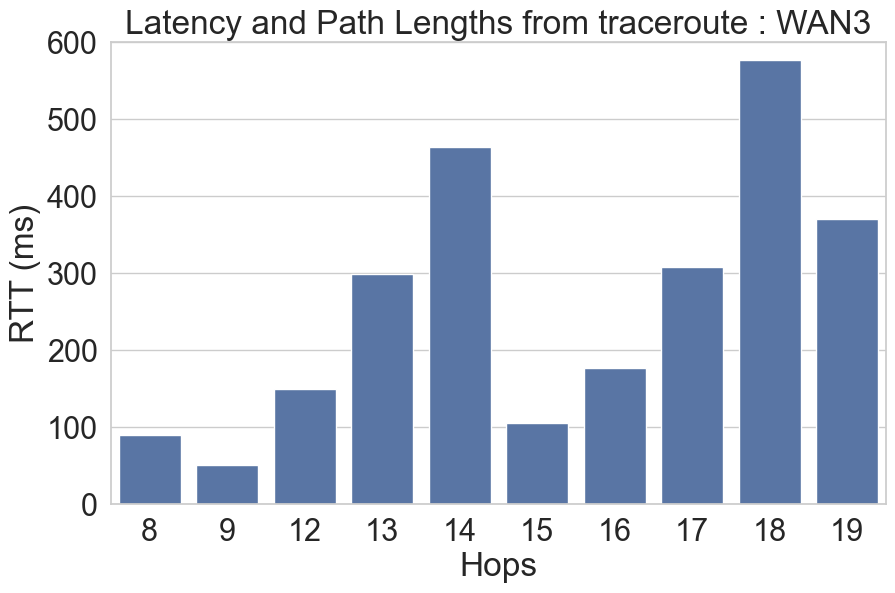

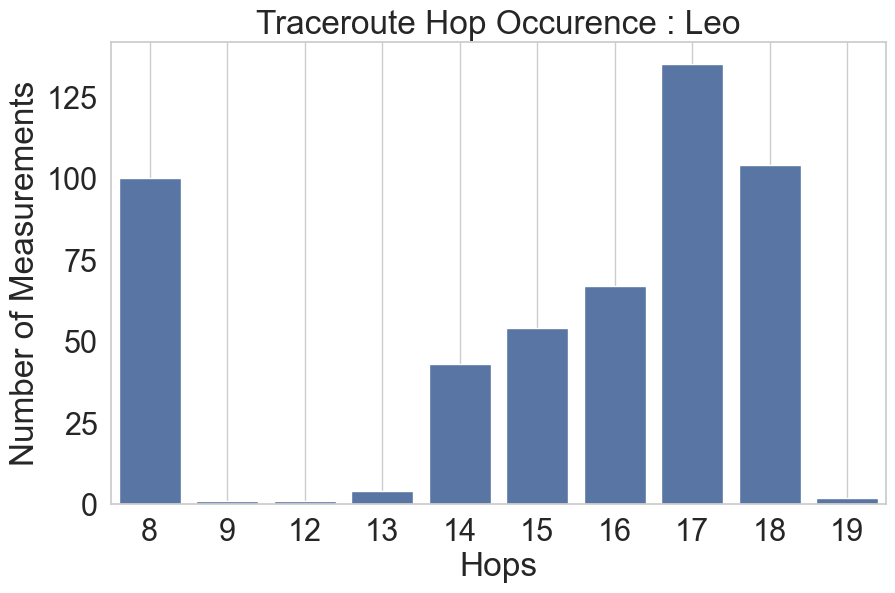

In [8]:
#Traceroute RTT and Traceroute Hops RIPE Atlas
#partially working
#remember to change destination address and labels
import math
kwargs = {
    "msm_id": 55517771
}

is_success, results = AtlasResultsRequest(**kwargs).create()

start_date = pd.to_datetime('2023-08-22').date()
end_date = pd.to_datetime('2023-11-15').date()
sns.set(style='whitegrid', font_scale=2)


if is_success:

    #CREATE A DATAFRAME WITH THE ENTIRETY OF THE MEASUREMENT RESULTS
    df1 = pd.json_normalize(results)

    rtt_within_hop = 0              #where we will add the 0-3 rtt results for each individual hop
    rtt_within_hop_count = 0        #to keep track of how many rtt results are in each hop
    average_rtt = 0                 #for the average rtt within each hop
    total_rtt_one_measurement = 0   #to add all of the hop averages to find overall rtt within one traceroute measurement

    traceroutes_hops = []           #all the hops for every traceroute
    hops_results = []               #need a 2D list so that measurements are not mixed together ask for help in writing this.
    hop_result2 = []                #holds average rtts per hop
    count = 0                       #count measurements
    count2 = 0                      #count hops
    #dest_addr = df1['dst_addr']
    dest_addr = '149.149.248.20'
    curr_addr = ''
    addresses = []

    # print(pd.to_datetime(df1['timestamp'], unit='s').date())

    for x, row in df1.iterrows(): 
        timestamp = pd.to_datetime(row['timestamp'], unit='s').date()
        if timestamp >= start_date and timestamp <= end_date:
            #print(row['result'])
            traceroutes_hops.append(pd.json_normalize(row['result'])) 
            if hasattr(traceroutes_hops[count], 'result'):
                for hop in traceroutes_hops[count]['result']:   #for each hop
                    hops_results.append(pd.json_normalize(hop))
                    count2+=1


            count+=1
      

    for x in hops_results: 
                                                            #for each hop
        #research iperf

        if 'rtt' in x:
            for rtt in x['rtt']:
                if not np.isnan(rtt):
                    rtt_within_hop += rtt
                    rtt_within_hop_count += 1
            for cur in x['from']:
                curr_addr = cur

        # Check if there is an 'x' attribute in 'result'
        else:
            rtt_within_hop = '*'
            rtt_within_hop_count = 0
            curr_addr = 'x'

        # print(rtt_within_hop)
       
        # Calculate the average or store '*' as appropriate
        if rtt_within_hop_count == 0:
            average_rtt = '*'  # If no 'rtt' values, store '*'
        else:
            average_rtt = rtt_within_hop / rtt_within_hop_count

        # print(average_rtt)

        hop_result2.append(average_rtt)                                     #append the averages to a list hop_result2
        addresses.append(curr_addr)
        rtt_within_hop = 0                                                  #reset rtt_within_hop, rtt_within_hop_count, and average_rtt to zero
        rtt_within_hop_count = 0
        average_rtt = 0



    hops = 0                    #keeps track of hop number
    hops_per_run = []           #list to hold the hop numbers
    start = 0                   #needed for range
    stop = 0                    #needed for range
    total_rtt_all_measurements = []     #list to hold the total rtts for each measurement
    count_m = 0                 #keeps track of how many measurements you have gone through (not really needed)
    count_star = 0              #keeps track of stars encountered (not really needed)


    for x, row in df1.iterrows():                                           #for each row in df1
        timestamp = pd.to_datetime(row['timestamp'], unit='s').date()
        if timestamp >= start_date and timestamp <= end_date:
        
            df1['result'][x] = pd.json_normalize(df1['result'][x])              #normalize the results

            for hop, row in df1['result'][x].iterrows():                        #for each hop in a single row
                if hasattr(df1['result'][x], 'result'):

                    hops = hops + 1                                                 #increment hops

            if hops > 2:
                hops_per_run.append(hops)                                           #append hops to hops_per_run, hops is equal to the number of hops in a single row (measurement)
            else:
                hops_per_run.append(0)
            hops = 0                                                            #set hops to zero so that each loop will produce the correct number of hops per row

    hops_copy = hops_per_run.copy()

    for i in hops_copy:  # Iterate through the copy
        stop = start + i  # Calculate the stop index based on the current hop count
        total_rtt_one_measurement = 0  # Initialize the total rtt for this measurement

        for avg in range(start, stop):  # Iterate over the range of RTT values
            if hop_result2[avg] != '*':
                total_rtt_one_measurement += hop_result2[avg]
        
        if addresses[stop - 1] == dest_addr:
            total_rtt_all_measurements.append(total_rtt_one_measurement)
        else:
            # del hops_per_run[hops_per_run.index(i)]  # Remove the corresponding hop count from the original list
            total_rtt_all_measurements.append('*')
        count_m += 1
        start = stop  # Update the start for the next iteration

    unique_num = []                         #this list will hold all of the unique hop counts
    total_hop_occurence = 0                 #keeps track of hop count occurence
    collective_rtt = 0                      #keeps track of collective rtt of a specific hop count
    average_rtt_of_hop = 0                  #keeps track of average rtt of a measurement with i number of hops
    all_averages = []                       #holds all of the rtt averages
    finished_hop_num = []                   #holds the hop counts of measurements that finished
    finished_hop_count = []                 #holds the occurence of measurements that finished
    data_for_stddev = []                    #will hold the rtts temporarily to calculate standard deviation
    stddev = 0
    std_for_hop = []


    for item in hops_per_run:                                               #for each item in hops_per_run
        if item not in unique_num and item != 0:                                          #if the item is not in unique_num, it is added
                unique_num.append(item)
    unique_num.sort()

    for item in unique_num:                                                 #for each item in unique_num
        for i in range(0, len(hops_per_run)):                               #for each index within the length of hops_per_run
            if hops_per_run[i] == item:                                     #if hops_per_run at that index is equal to the item in unique_num
                if total_rtt_all_measurements[i] != '*':                    #if the rtt at index i of total_rtt_all_measurements is not a * (* means the measurement did not complete)
                    total_hop_occurence += 1                                #increment total_hop_occurence
                    collective_rtt += total_rtt_all_measurements[i]         #add the rtt to collective_rtt
                    data_for_stddev.append(total_rtt_all_measurements[i])

        #print(data_for_stddev)


        if total_hop_occurence != 0:                                        #if total_hop_occurence is not zero
            average_rtt_of_hop = collective_rtt / total_hop_occurence       #calculate the average rtt of hop count "item"
            finished_hop_num.append(item)                                   #append hop count "item" to finished_hop_num
            finished_hop_count.append(total_hop_occurence)                  #append the total_hop_occurence to finished_hop_count
        else:
            average_rtt_of_hop = '*'                                        #if total_hop_occurence is zero, the average rtt of the hop count "item" is set to *
            
        if average_rtt_of_hop != '*':                                       #if the average_rtt_of_hop is not a * (measurements were completed), append to all_averages
            all_averages.append(average_rtt_of_hop)

        total_hop_occurence = 0                                             #reset total_hop_occurence and collective_rtt to zero
        collective_rtt = 0

        stddev = np.std(data_for_stddev)
        if np.isnan(stddev) == False:
            std_for_hop.append(stddev)
        data_for_stddev.clear()


plt.figure(figsize=(10, 6))
sns.barplot(x=finished_hop_num, y=all_averages, errorbar="sd")  # Include yerr for standard error
plt.title('Latency and Path Lengths from traceroute : WAN3')
plt.ylabel('RTT (ms)')
plt.xlabel('Hops')
plt.ylim(0,600)
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=finished_hop_num, y=finished_hop_count)
plt.title('Traceroute Hop Occurence : Leo')
plt.ylabel('Number of Measurements')
plt.xlabel('Hops')
# plt.ylim(0,100)
plt.grid()
plt.show()

#combine traceroute hops cell into this cell because we already have access to which measurements completed so we can add a count var within
#the for loop to capture the occurences of completed measurements per hop count and append to a list then graph both inside of one cell :)


In [ ]:
#Ping RTT (Leo Data) - single measurement
#works
with open('pingTest9-17pmOct200.json', 'r') as f:
    data = json.loads(f.read())
df1 = pd.DataFrame(data)

rtt = []
for x, row in df1.iterrows():
    df1['icmp_replies'][x] = pd.json_normalize(df1['icmp_replies'][x])
    for result in df1['icmp_replies'][x]:
        rtt.append(df1['icmp_replies'][x]['time'])

data = np.array(rtt)
count, bins_count = np.histogram(data, bins=300)
pdf = count / np.sum(count)
cdf = np.cumsum(pdf)
plt.plot(bins_count[1:], cdf, label="Ping RTT CDF")
plt.ylim([0, 1.0])
plt.title('Ping RTT')
plt.ylabel('Percentage')
plt.xlabel('RTT(in milliseconds)')
plt.grid()
plt.legend()

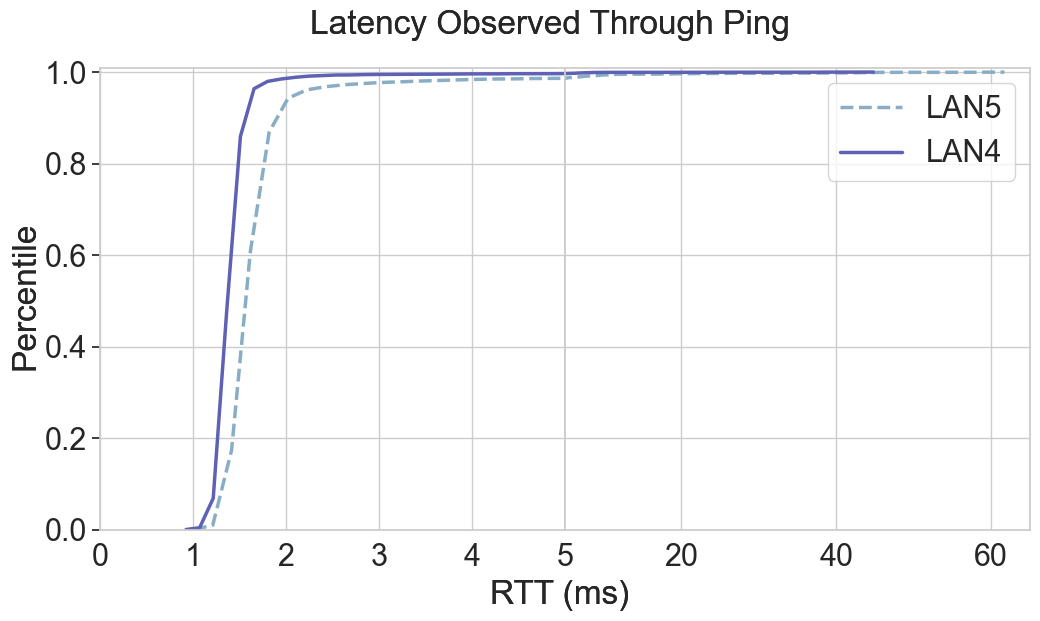

In [8]:
#Command-Line Ping RTT CDF
#works

import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

path = ["LAN5", "LAN4"]
style = ["dashed", "solid"]
p, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, sharey=True, figsize=(12,6))

def plot_ping_rtt(files):
    #plt.figure(figsize=(12,6))

    idx = -1
    for file_path in files:
        idx = idx + 1
        # Read the JSON file
        with open(file_path, 'r') as f:
            data = json.load(f)

        # Create a DataFrame from the JSON data
        df1 = pd.DataFrame(data)

        # Extract RTT values
        rtt = []
        for x, row in df1.iterrows():
            if pd.to_datetime(row['timestamp'], unit='s').date() >= start_date and pd.to_datetime(row['timestamp'], unit = 's').date() <= end_date:

                transmissions = df1['ping_data'][x]
                for transmission in transmissions:
                    rtt.append(transmission['time'])


        # Convert RTT to numpy array
        data = np.array(rtt)

        # Compute histogram
        count, bins_count = np.histogram(data, bins=300)
        pdf = count / np.sum(count)
        cdf = np.cumsum(pdf)

        cdf = np.insert(cdf, 0, 0)

        # Set Seaborn style
        sns.set(style='whitegrid', font_scale=2, palette="twilight")
        # Create the CDF plot using Seaborn
        #sns.lineplot(x=bins_count, y=cdf, linewidth = 2.5, linestyle=style[idx], ax = ax1)
        sns.lineplot(x=bins_count, y=cdf, linewidth = 2.5, linestyle=style[idx], ax = ax1)
        sns.lineplot(x=bins_count, y=cdf, label=path[idx], linewidth = 2.5, linestyle=style[idx], ax = ax2)

        #sns.lineplot(x=bins_count, y=cdf, label=path[idx], linewidth = 2.5, linestyle=style[idx])

        plt.grid(True)  # Add this line to enable the grid
    
        plt.ylim([0, 1.01])
        #plt.xlim([15, 50])

        #plt.ylim([0, 1.01])

        ax1.set_xlim(0, 5)
        ax2.set_xlim(5, 65)
        #ax3.set_xlim(20, 3000)
        ax1.set_ylabel("")
        ax1.set_xlabel("")
        ax2.set_ylabel("")
        ax1.set_xlabel("")
        #ax3.set_ylabel("")
        #ax3.set_xlabel("")

        # then, set a new label on the plot (basically just a piece of text) and move it to where it makes sense (requires trial and error)
        p.text(0.30, 0.95, "Latency Observed Through Ping", va="center")
        p.text(0.05, 0.50, "Percentile", va="center", rotation="vertical")
        p.text(0.45, 0.00, "RTT (ms)", va="center")


        # let's put some ticks on the top of the upper part and bottom of the lower part for style
        #ax1.xaxis.tick_top()
        ax1.yaxis.tick_left()

        # finally, adjust everything a bit to make it prettier (this just moves everything, best to try and iterate)
        plt.subplots_adjust(wspace=0, hspace=1)
    plt.show()
    # plt.title('Latency Observed Through Ping')
    # plt.ylabel('Percentile')
    # plt.xlabel('RTT (ms)')

    # plt.legend()
    # plt.show()  # Show the plot for each file

# List of file paths
#files = ['ping_data_66.json', 'ping_data_206.json', 'ping_data_192.json']  # Replace with the actual file paths
#files = ['ping-5days-192.111.110.77-data-leo.json', 'ping-5days-206.71.76.62-data-perf.json', 'ping-5days-206.71.76.62-data-leo.json', 'ping-5days-66.99.43.226-data-perf.json','ping-5days-66.99.43.226-data-leo.json','ping-5days-192.111.110.77-data-perf.json' ]
#files = ['local-extern/ping-leo-136-118-2.json', 'local-extern/ping-pf1-136-118.json', 'local-extern/ping-dtn1-136-118.json']
#files = ['gcp_files/ping-oct5-149.149.2.70.json', "gcp_files/ping-oct5-149.149.248.20.json", "gcp_files/ping-oct5-149.149.248.52.json"]
#files = ['lan_files/lan1-ping-new.json', 'lan_files/lan2-ping-new.json', 'lan_files/lan3-ping-new.json']
files = ['lan_files/leo-gateway.json', 'lan_files/pf1-gateway.json']

start_date = pd.to_datetime('2024-02-06').date()
end_date = pd.to_datetime('2024-02-23').date()
# Plot Ping RTT for each file
plot_ping_rtt(files)


In [ ]:
#Ping RTT (PerfSONAR) - single measurement 
#works

with open('example2.json', 'r') as f:
    data = json.loads(f.read())

d1 = data["val"]                                #section off values section of aggregation file
d1 = {float(k):v for (k,v) in d1.items()}       #convert keys to floats
d1 = dict(sorted(d1.items()))                   #sort d1 by keys (rtt)

xAxis = [key for key, value in d1.items()]      #rtt
yAxis = [value for key, value in d1.items()]    #occurences
plt.grid(True)
plt.plot(xAxis,yAxis, color='maroon', marker='o')
plt.xlabel('rtt')
plt.ylabel('occurences')

plt.show()

count = np.array(yAxis)
bins_count = np.array(xAxis)

pdf = count / np.sum(count)
cdf = np.cumsum(pdf)

plt.plot(bins_count[0:], cdf, label="Ping RTT CDF")
plt.ylim([0, 1.0])
plt.title('Ping RTT ' + data["ip"])
plt.ylabel('Percentage')
plt.xlabel('RTT(in milliseconds)')
plt.grid()
plt.legend()


In [ ]:
#Traceroute Hops perfSONAR
import math
files = ['192_10hr.json', '209_10hr.json']
#files = ['216_10hr.json', '207_10hr.json']
#files = ['136_10hr.json', '67_10hr.json', '141_10hr.json', '66_10hr.json', '206_10hr.json']

for file in files:
    with open(file, 'r') as f:
        data = json.loads(f.read())

    data_points = 0
    hops = 0
    total_hop_occurence = 0
    hop_rtt = 0 
    total_rtt = 0
    average_rtt = 0
    stddev = 0
    collective_rtt = 0
    ttl = 0
    dest = ''


    total_hops = []
    unique_num = []
    finished_hop_num = []
    finished_hop_count = []
    total_averages = []
    total_rtts = []
    std_for_hop = []


    for i in data:
        data_points = data_points + 1
        for item in data[data_points - 1]['val']:
            ttl += 1                                                    #keep track of attempted hops
            if 'rtt' in item:                                           #only sums the completed hops
                hops = hops + 1
                hop_rtt = item['rtt']
                total_rtt += hop_rtt

        if 'rtt' not in i['val'][ttl-1]:                                #check if trace actually finished
            hops = '*'                                                  #if no rtt, trace didn't finish, so set hops to *
        else:
            dest = i['val'][ttl-1]['ip']                                #store destination to use in graph label

        if hops != '*' :
            total_hops.append(hops)
            total_rtts.append(total_rtt)
            average_rtt = total_rtt/hops

        hops = 0
        total_rtt = 0
        average_rtt = 0
        ttl = 0

    for item in total_hops:                                               #for each item in hops_per_run
        if item not in unique_num:                                          #if the item is not in unique_num, it is added
                unique_num.append(item)

    for item in unique_num:                                                 #for each item in unique_num
            for i in range(0, len(total_hops)):                               #for each index within the length of hops_per_run
                if total_hops[i] == item:                                     #if hops_per_run at that index is equal to the item in unique_num
                    #if total_rtt_all_measurements[i] != '*':                    #if the rtt at index i of total_rtt_all_measurements is not a * (* means the measurement did not complete)
                    total_hop_occurence += 1                               #increment total_hop_occurence
                    collective_rtt += total_rtts[i]         #add the rtt to collective_rtt
                        #data_for_stddev.append(total_rtt_all_measurements[i])

            if total_hop_occurence != 0:                                        #if total_hop_occurence is not zero
                average_rtt_of_hop = collective_rtt / total_hop_occurence       #calculate the average rtt of hop count "item"
                finished_hop_num.append(item)                                   #append hop count "item" to finished_hop_num
                finished_hop_count.append(total_hop_occurence)                  #append the total_hop_occurence to finished_hop_count
            #else:
                #average_rtt_of_hop = '*'                                        #if total_hop_occurence is zero, the average rtt of the hop count "item" is set to *
            #if average_rtt_of_hop != '*':                                       #if the average_rtt_of_hop is not a * (measurements were completed), append to all_averages
            total_averages.append(average_rtt_of_hop)
            total_hop_occurence = 0                                             #reset total_hop_occurence and collective_rtt to zero
            collective_rtt = 0

            stddev = np.std(total_rtts)
            if math.isnan(stddev) == False:
                std_for_hop.append(stddev)



    plt.bar(x = finished_hop_num, height = total_averages, width = 0.5, yerr = std_for_hop, align='center', alpha=0.75, capsize=10)

plt.title('Traceroute RTT ')
plt.ylabel('Round Trip Time (milliseconds)')
plt.xlabel('Hops')
plt.grid()
plt.show()

for file in files:
    with open(file, 'r') as f:
        data = json.loads(f.read())

    data_points = 0
    hops = 0
    total_hop_occurence = 0
    hop_rtt = 0 
    total_rtt = 0
    average_rtt = 0
    stddev = 0
    collective_rtt = 0
    ttl = 0
    dest = ''


    total_hops = []
    unique_num = []
    finished_hop_num = []
    finished_hop_count = []
    total_averages = []
    total_rtts = []
    std_for_hop = []


    for i in data:
        data_points = data_points + 1
        for item in data[data_points - 1]['val']:
            ttl += 1                                                    #keep track of attempted hops
            if 'rtt' in item:                                           #only sums the completed hops
                hops = hops + 1
                hop_rtt = item['rtt']
                total_rtt += hop_rtt

        if 'rtt' not in i['val'][ttl-1]:                                #check if trace actually finished
            hops = '*'                                                  #if no rtt, trace didn't finish, so set hops to *
        else:
            dest = i['val'][ttl-1]['ip']                                #store destination to use in graph label

        if hops != '*' :
            total_hops.append(hops)
            total_rtts.append(total_rtt)
            average_rtt = total_rtt/hops

        hops = 0
        total_rtt = 0
        average_rtt = 0
        ttl = 0

    for item in total_hops:                                               #for each item in hops_per_run
        if item not in unique_num:                                          #if the item is not in unique_num, it is added
                unique_num.append(item)

    for item in unique_num:                                                 #for each item in unique_num
            for i in range(0, len(total_hops)):                               #for each index within the length of hops_per_run
                if total_hops[i] == item:                                     #if hops_per_run at that index is equal to the item in unique_num
                    #if total_rtt_all_measurements[i] != '*':                    #if the rtt at index i of total_rtt_all_measurements is not a * (* means the measurement did not complete)
                    total_hop_occurence += 1                               #increment total_hop_occurence
                    collective_rtt += total_rtts[i]         #add the rtt to collective_rtt
                        #data_for_stddev.append(total_rtt_all_measurements[i])

            if total_hop_occurence != 0:                                        #if total_hop_occurence is not zero
                average_rtt_of_hop = collective_rtt / total_hop_occurence       #calculate the average rtt of hop count "item"
                finished_hop_num.append(item)                                   #append hop count "item" to finished_hop_num
                finished_hop_count.append(total_hop_occurence)                  #append the total_hop_occurence to finished_hop_count
            #else:
                #average_rtt_of_hop = '*'                                        #if total_hop_occurence is zero, the average rtt of the hop count "item" is set to *
            #if average_rtt_of_hop != '*':                                       #if the average_rtt_of_hop is not a * (measurements were completed), append to all_averages
            total_averages.append(average_rtt_of_hop)
            total_hop_occurence = 0                                             #reset total_hop_occurence and collective_rtt to zero
            collective_rtt = 0

            stddev = np.std(total_rtts)
            if math.isnan(stddev) == False:
                std_for_hop.append(stddev)

    plt.scatter(x = finished_hop_num, y = finished_hop_count, s = 50)
plt.title('Traceroute Hop Occurence ')
plt.ylabel('Number of Measurements')
plt.xlabel('Hops')
plt.grid()
plt.show()

#change to clusters/ scatterplot





In [ ]:
#Traceroute Hops CDF (perfSONAR)
files = ['136_10hr.json', '141_10hr.json', '192_10hr.json', '66_10hr.json', '206_10hr.json', '207_10hr.json', '209_10hr.json', '216_10hr.json', '67_10hr.json']

#files = ['136_10hr.json', '67_10hr.json', '206_10hr.json']

for file in files:
    with open(file, 'r') as f:
        data = json.loads(f.read())

    data_points = 0
    hops = 0
    ttl = 0
    dest = ''

    total_hops = []


    for i in data:
        data_points = data_points + 1
        for item in data[data_points - 1]['val']:
            ttl += 1                                                    #keep track of attempted hops
            if 'rtt' in item:                                           #only sums the completed hops
                hops = hops + 1

        if 'rtt' not in i['val'][ttl-1]:                                #check if trace actually finished
            hops = '*'                                                  #if no rtt, trace didn't finish, so set hops to *
        else:
            dest = i['val'][ttl-1]['ip']                                #store destination to use in graph label

        if hops != '*' :
            total_hops.append(hops)

        hops = 0
        ttl = 0

    #SET DATA TO hops_per_run     
    data = np.array(total_hops)

    #CREATE HISTOGRAM
    count, bins_count = np.histogram(data, bins=300)

    #CALCULATE PDF
    pdf = count / np.sum(count)

    #CALCULATE CDF
    cdf = np.cumsum(pdf)


    #PLOT CDF
    plt.plot(bins_count[1:], cdf, label=dest)

plt.ylim([0,1.0])
plt.title('Traceroute Hops CDF')
plt.ylabel('Percentage')
plt.xlabel('Hops')
plt.grid()
plt.legend()

#ALTHOUGH BINS=300 IN THIS CELL, THE GRAPH WILL NEVER START AT 0 PERCENT DUE TO THE DATA IT CONTAINS
   

In [ ]:
#Traceroute CDF (Perfsonar1 / Leo Version)

import json
import numpy as np
import matplotlib.pyplot as plt

with open('gcp_files/trace-oct15-149.149.2.70.json', 'r') as file:
    traceroutes = json.load(file)

num_hops = []
rtt_sum = []
destination = ""

for x in range(0, len(traceroutes)):
    destination = traceroutes[x]['destination']
    hops = 0
    rtt_total = 0
    if traceroutes[x]['hops'][-1]['ip_address'] == destination:
        for h in traceroutes[x]['hops']:
            hops += 1
        #hops += traceroutes[x]['hops'][-1]['hop_number']
    for hop in traceroutes[x]['hops']:
        if 'rtt' in hop and hop['rtt'] != '*':
            rtt_total += hop['rtt']
            #hops += 1
    if hops > 0:
        num_hops.append(hops)
        rtt_sum.append(rtt_total)

# Calculate CDF
data = np.array(num_hops)
count, bins_count = np.histogram(data, bins=300)
pdf = count / np.sum(count)
cdf = np.cumsum(pdf)


# Prepend a data point at (0, 0) to ensure the line starts at zero
cdf = np.insert(cdf, 0, 0)

# Set Seaborn style
sns.set(style='darkgrid')
#sns.color_palette("dark")

# Create the CDF plot using Seaborn
sns.lineplot(x=bins_count, y=cdf, label="", color = "#F975CE")

plt.ylim([0, 1.0])
plt.title('Traceroute Hops CDF : GCP - PF1')
plt.ylabel('Percentage')
plt.xlabel('Hops')
plt.legend()
plt.show()

# # Plot CDF
# plt.plot(bins_count[1:], cdf)

# plt.ylim([0, 1.0])
# plt.title('Traceroute Hops CDF : GCP - DTN1')
# plt.ylabel('Percentage')
# plt.xlabel('Hops')
# plt.grid()
# plt.show()


unique_num = []
num_occurence = []
total = 0

for item in num_hops:
    if item not in unique_num:
        unique_num.append(item)

for num in unique_num:
    for item in num_hops:
        if item == num:
            total += 1 
    num_occurence.append(total)        
    total = 0

# Create the CDF plot using Seaborn
sns.scatterplot(x=unique_num, y=num_occurence, label="", color = "#F975CE")

plt.title('Traceroute Hops Occurence : GCP - PF1')
plt.ylabel('Number of Measurements')
plt.xlabel('Hops')
plt.legend()
plt.show()


# plt.scatter(x = unique_num, y = num_occurence, s = 50)
# plt.title('Traceroute Hop Occurence : GCP - DTN1')
# plt.ylabel('Number of Measurements')
# plt.xlabel('Hops')
# plt.grid()
# plt.show()



In [ ]:
#Traceroute RTT/Hops Bar (Perfsonar1 / Leo Version)

import json
import numpy as np
import matplotlib.pyplot as plt

with open('lan_files/lan3-trace-new.json', 'r') as file:
    traceroutes = json.load(file)

start_date = pd.to_datetime('2023-08-22').date()
end_date = pd.to_datetime('2023-11-15').date()

num_hops = []
rtt_sum = []
destination = ""
timestamp = ''

for x in range(0, len(traceroutes)):
    destination = traceroutes[x]['destination']
    hops = 0
    rtt_total = 0
    timestamp = pd.to_datetime(traceroutes[x]['timestamp'], unit='s').date()
    if timestamp >= start_date and timestamp <= end_date:
        if traceroutes[x]['hops'][-1]['ip_address'] == destination:
            #hops = traceroutes[x]['hops'][-1]['hop_number']
            for h in traceroutes[x]['hops']:
                hops += 1
                #hops += traceroutes[x]['hops'][-1]['hop_number']
        for hop in traceroutes[x]['hops']:
            if 'rtt' in hop and hop['rtt'] != '*':
                rtt_total += hop['rtt']
                #hops += 1
        if hops > 0:
            num_hops.append(hops)
            rtt_sum.append(rtt_total)

unique_num = []
num_occurence = []
total = 0
average_rtt = 0
stddev = 0
avg = []
std_for_hop = []
data_for_stddev = []

for item in num_hops:
    if item not in unique_num:
        unique_num.append(item)

for num in unique_num:
    numerator = 0
    for i in range(0, len(num_hops)):
        if num_hops[i] == num:
            total += 1
            numerator = numerator + rtt_sum[i] 
            data_for_stddev.append(rtt_sum[i])    
    average_rtt = numerator / total
    num_occurence.append(total)   
    avg.append(average_rtt)     
    total = 0


    stddev = np.std(data_for_stddev)
    if np.isnan(stddev) == False:
        std_for_hop.append(stddev)
    data_for_stddev.clear()


# Set Seaborn style
sns.set(style='whitegrid', font_scale=2)

plt.figure(figsize=(10, 6))
# sns.barplot(x=unique_num, y=avg, errorbar="sd", yerr=std_for_hop)  # Include yerr for standard error
sns.barplot(x=unique_num, y=avg, errorbar="sd")  # Include yerr for standard error
plt.title('Latency and Path Lengths from traceroute : LAN3')
plt.ylabel('RTT (ms)')
plt.xlabel('Hops')
#plt.ylim(0,310)
plt.show()

# Create the CDF plot using Seaborn
sns.barplot(x=unique_num, y=num_occurence, label="")

plt.title('Traceroute Hops Occurence : GCP - Leo')
plt.ylabel('Number of Measurements')
plt.xlabel('Hops')
plt.legend()
plt.show()




/Users/emily/.pyenv/versions/3.9.6/lib/python3.9/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/emily/.pyenv/versions/3.9.6/lib/python3.9/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/Users/emily/.pyenv/versions/3.9.6/lib/python3.9/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


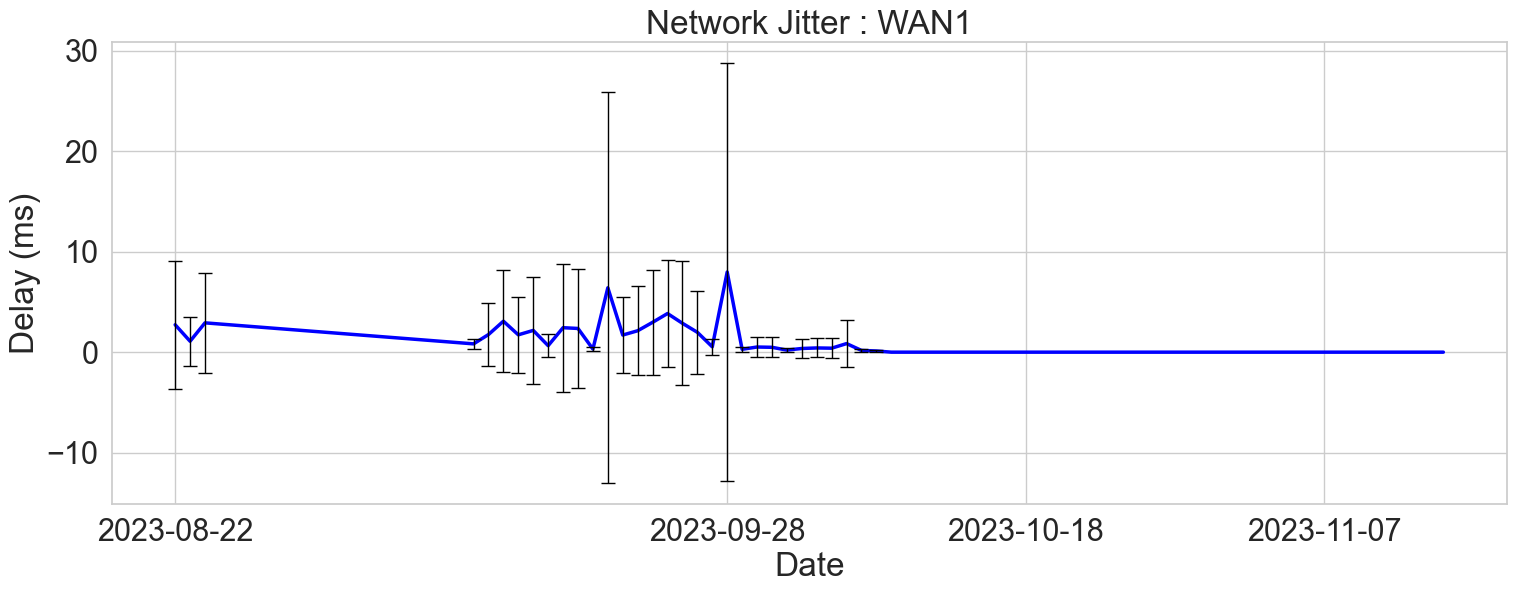

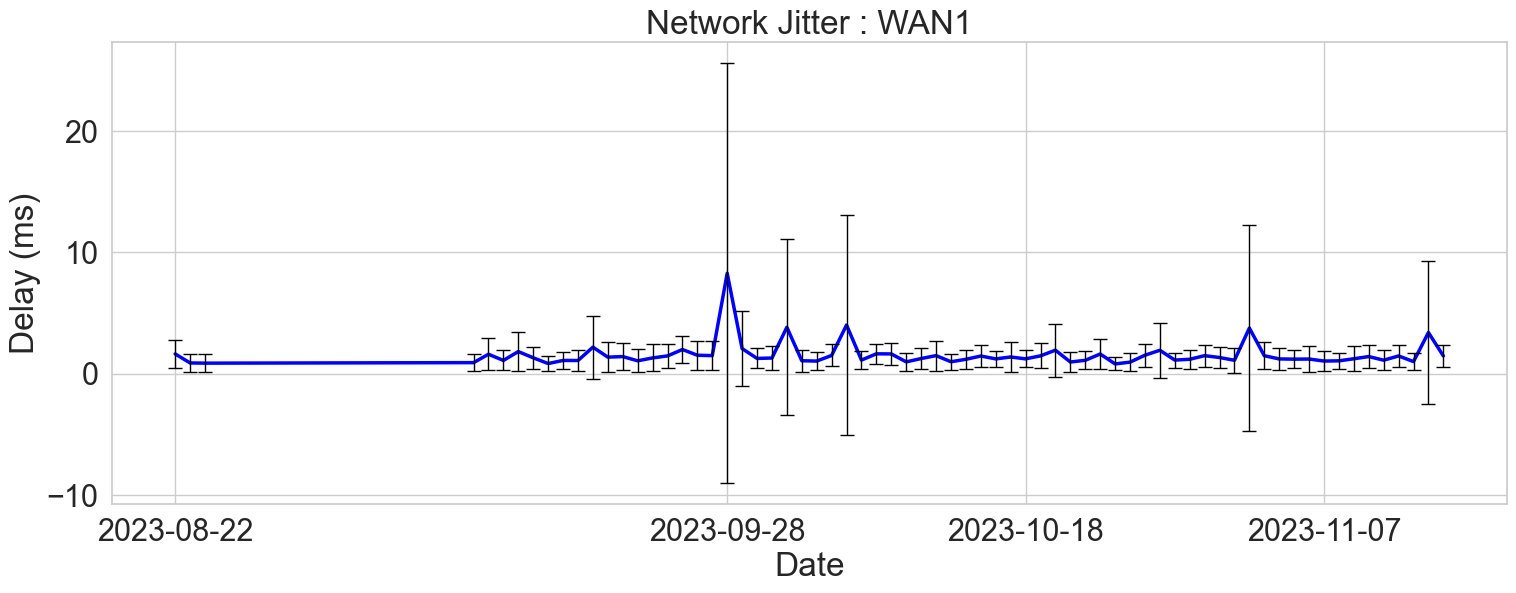

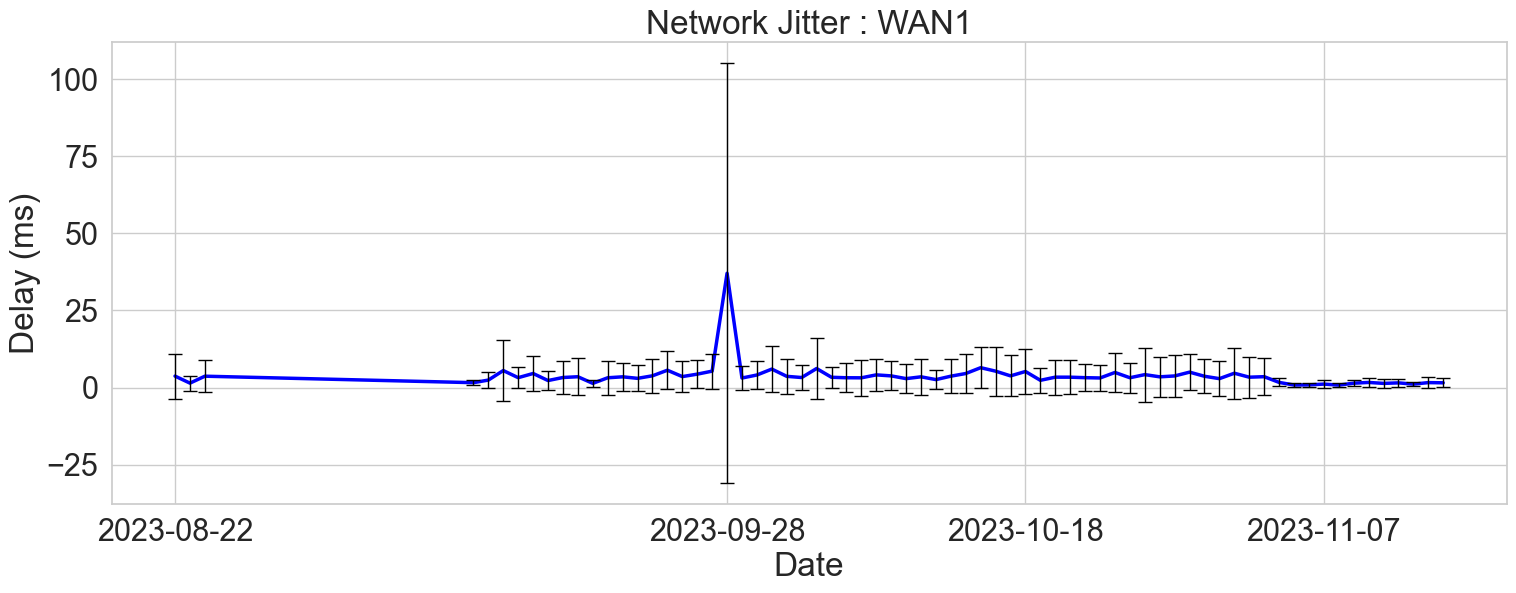

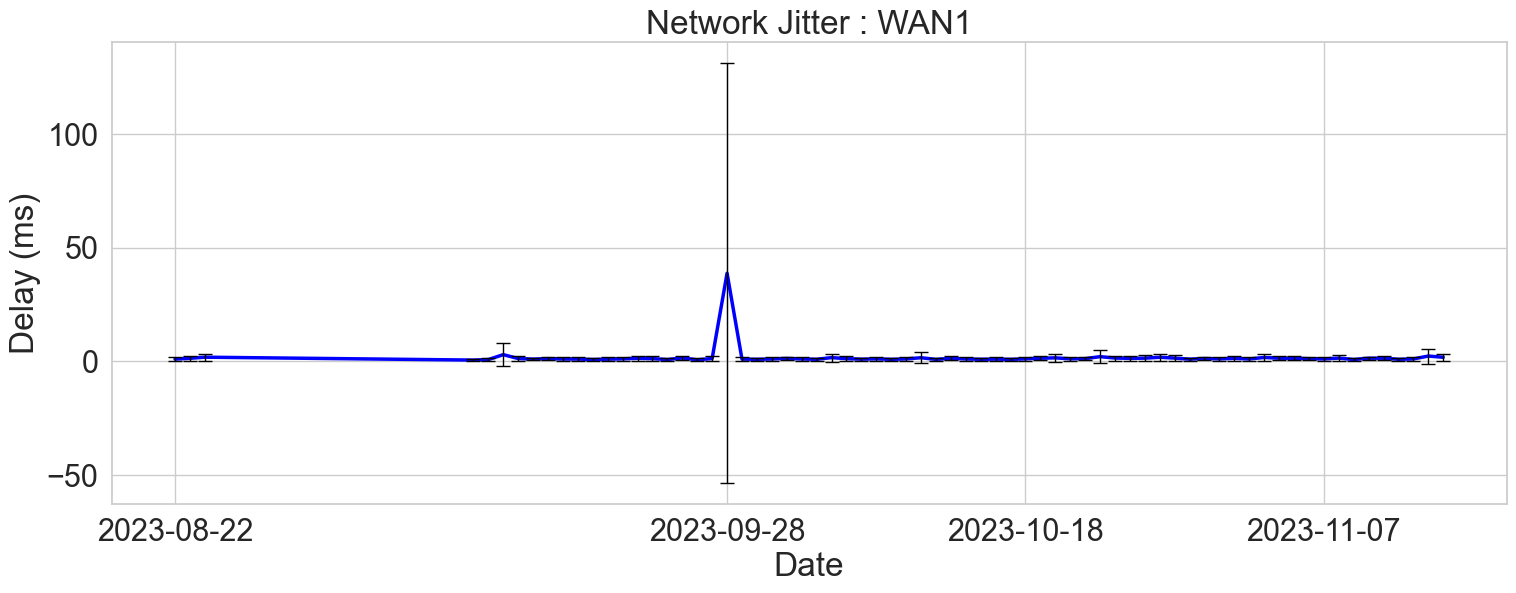

/Users/emily/.pyenv/versions/3.9.6/lib/python3.9/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/emily/.pyenv/versions/3.9.6/lib/python3.9/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/Users/emily/.pyenv/versions/3.9.6/lib/python3.9/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/emily/.pyenv/versions/3.9.6/lib/python3.9/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/emily/.pyenv/versions/3.9.6/lib/python3.9/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/Users/emily/.pye

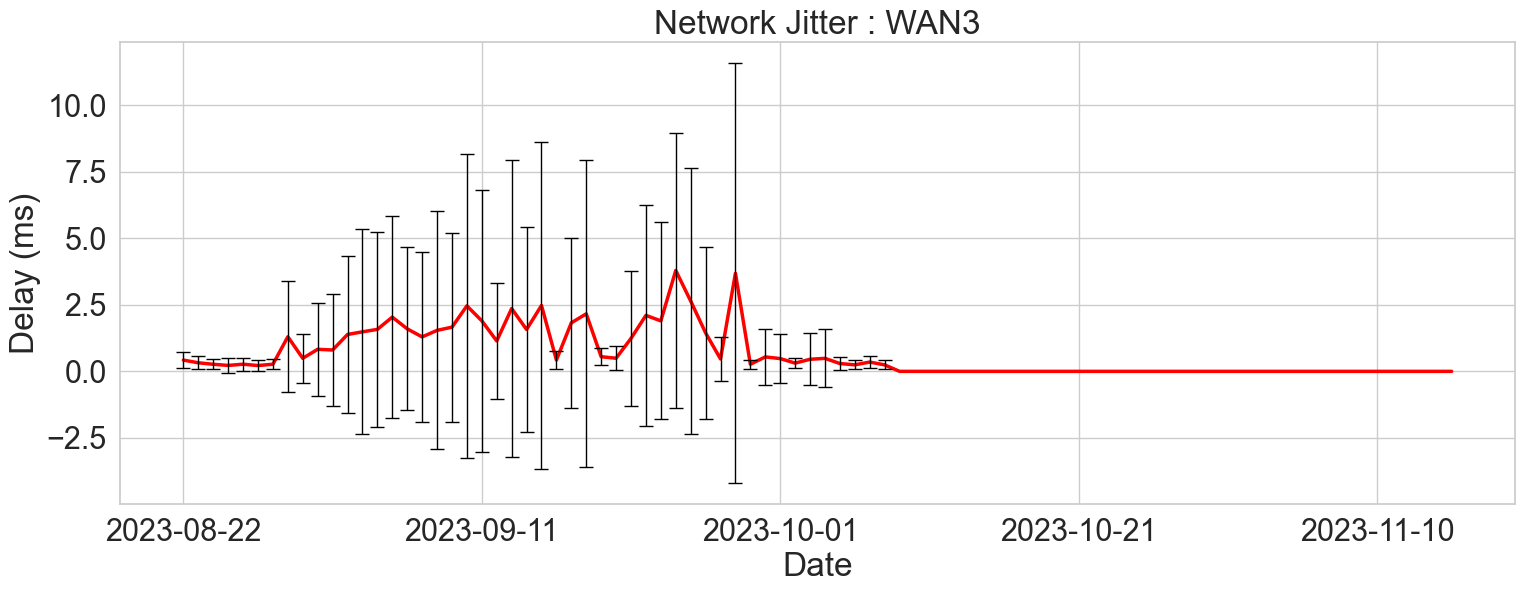

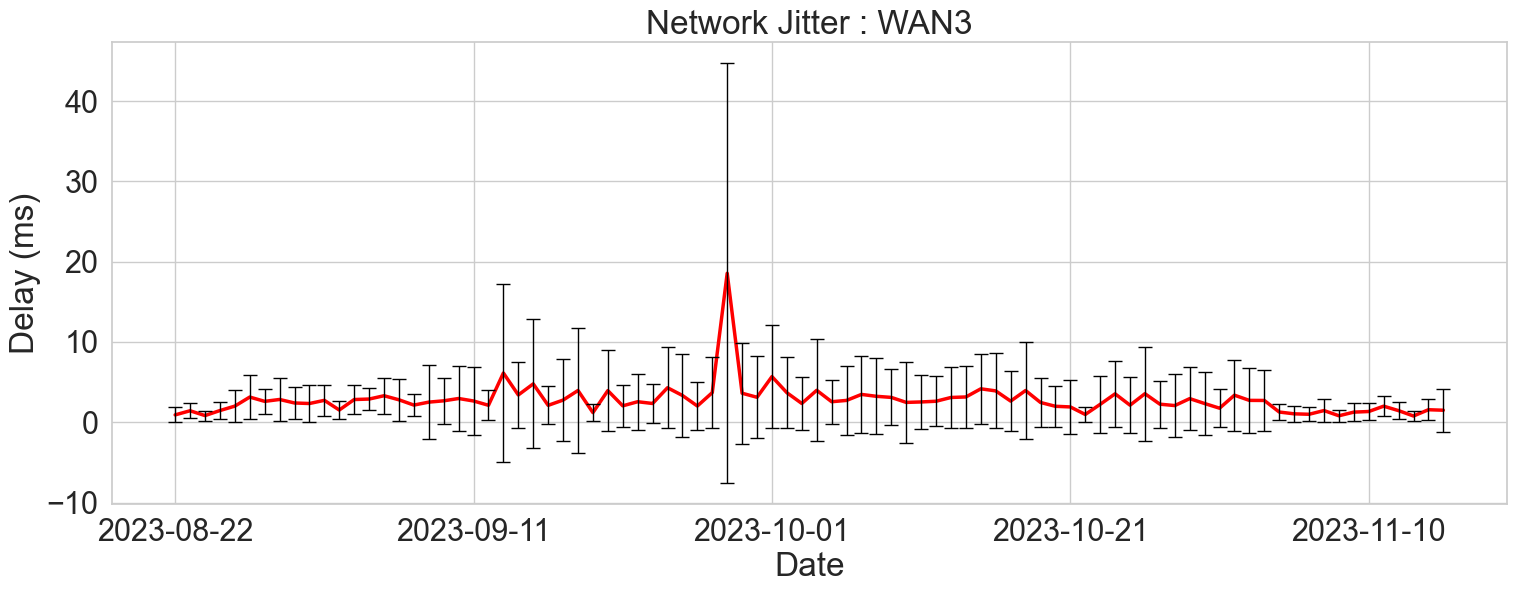

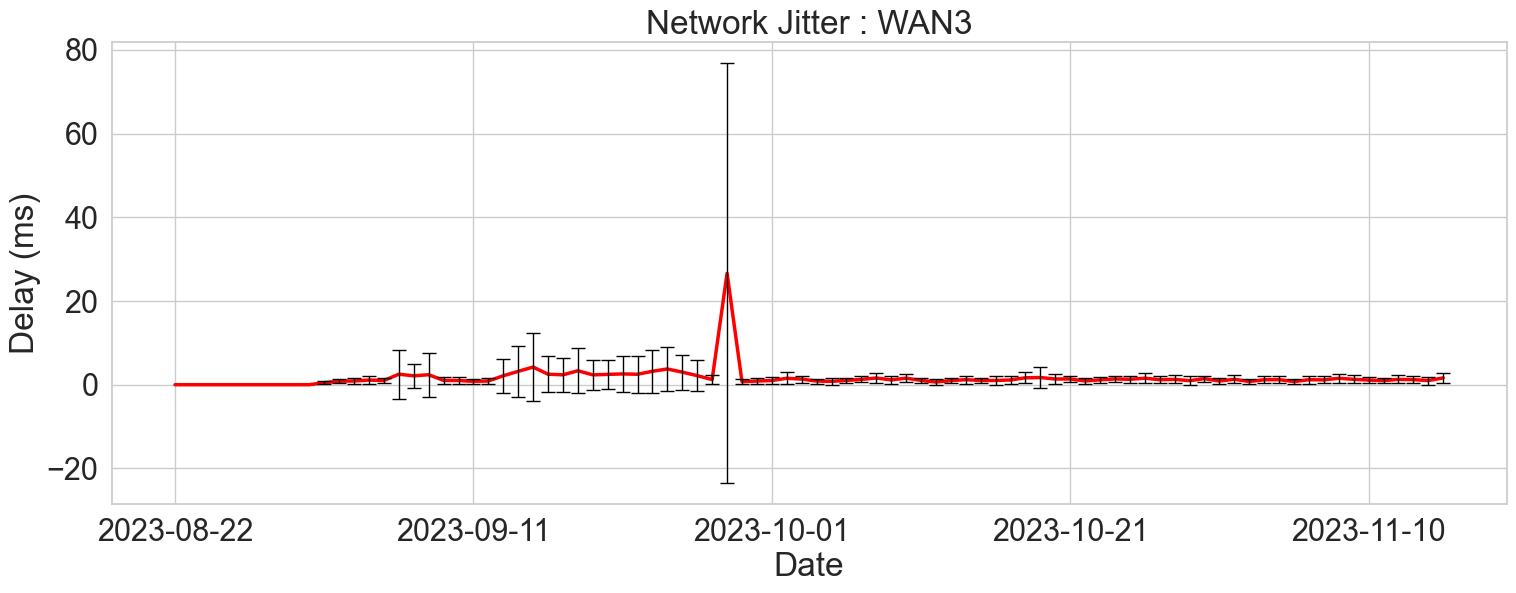

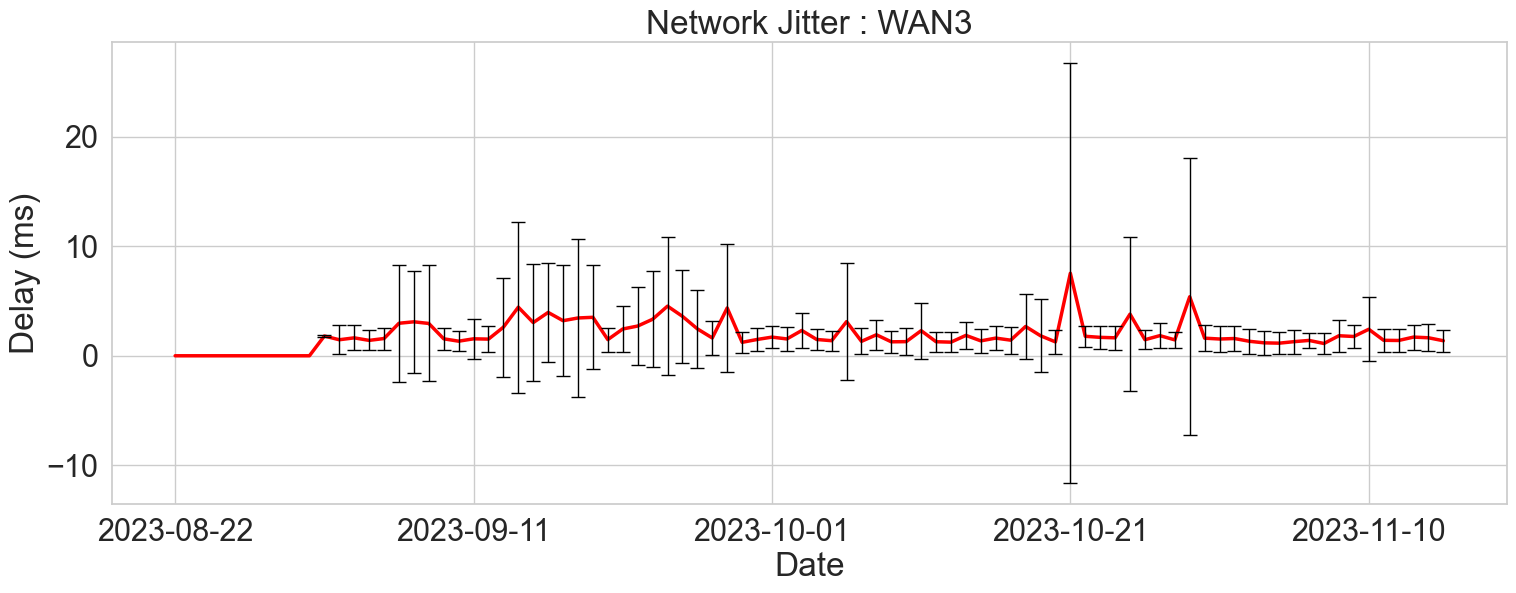

/Users/emily/.pyenv/versions/3.9.6/lib/python3.9/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/emily/.pyenv/versions/3.9.6/lib/python3.9/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/Users/emily/.pyenv/versions/3.9.6/lib/python3.9/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/emily/.pyenv/versions/3.9.6/lib/python3.9/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/emily/.pyenv/versions/3.9.6/lib/python3.9/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/Users/emily/.pye

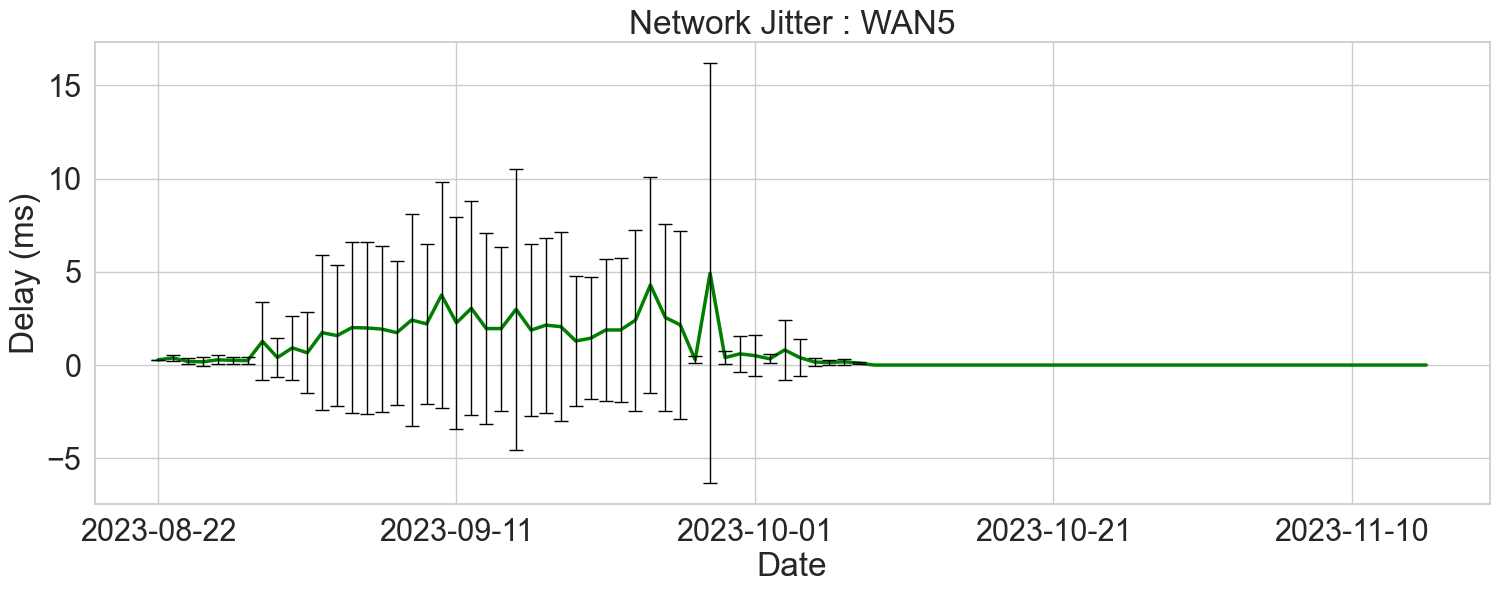

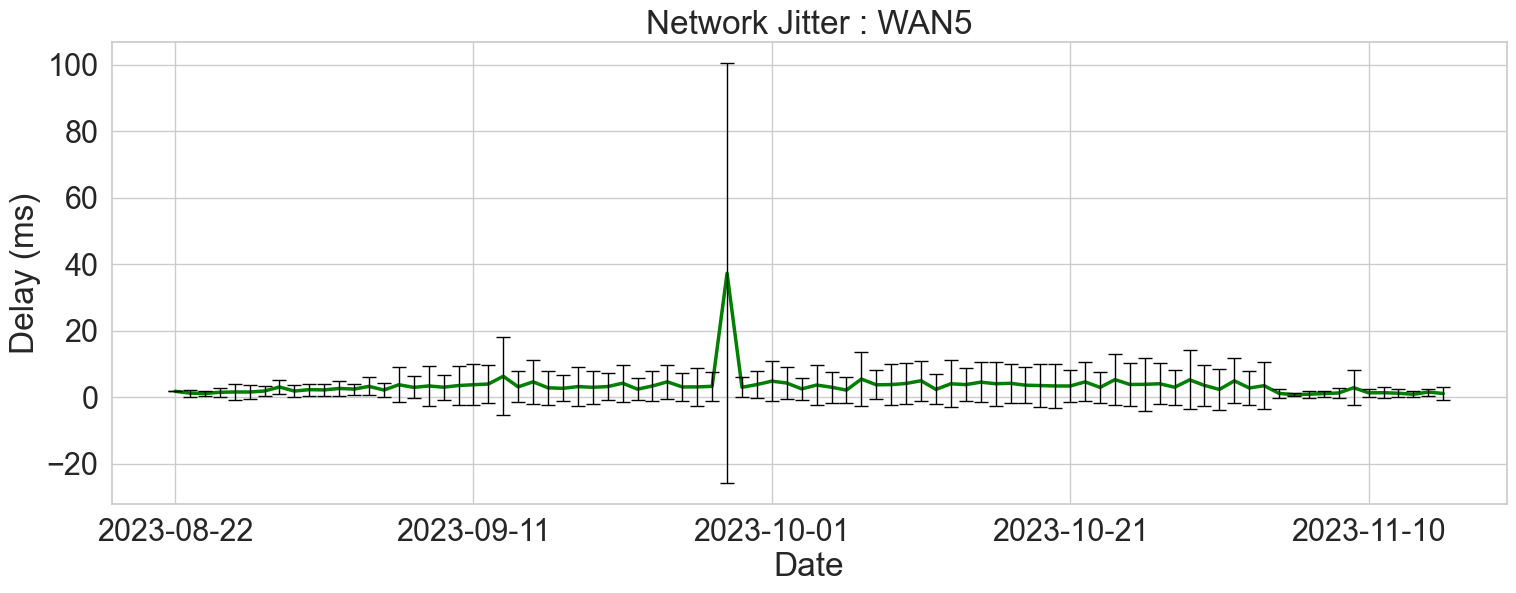

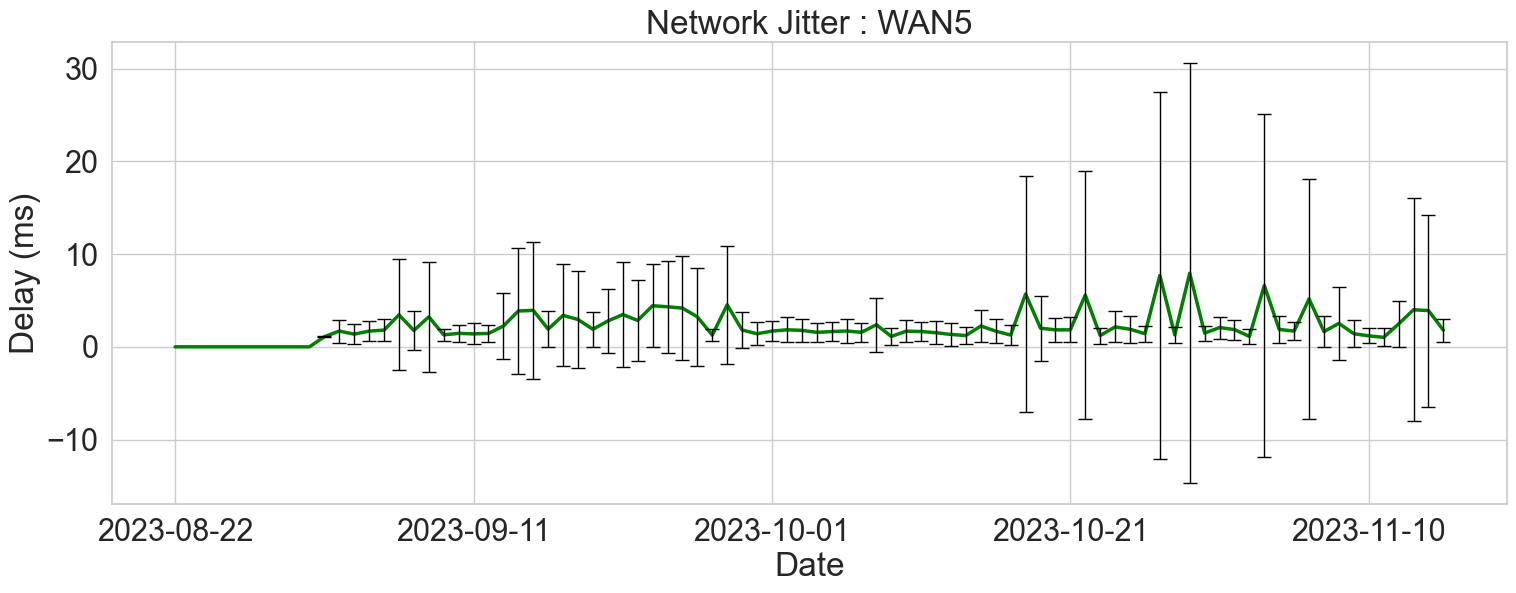

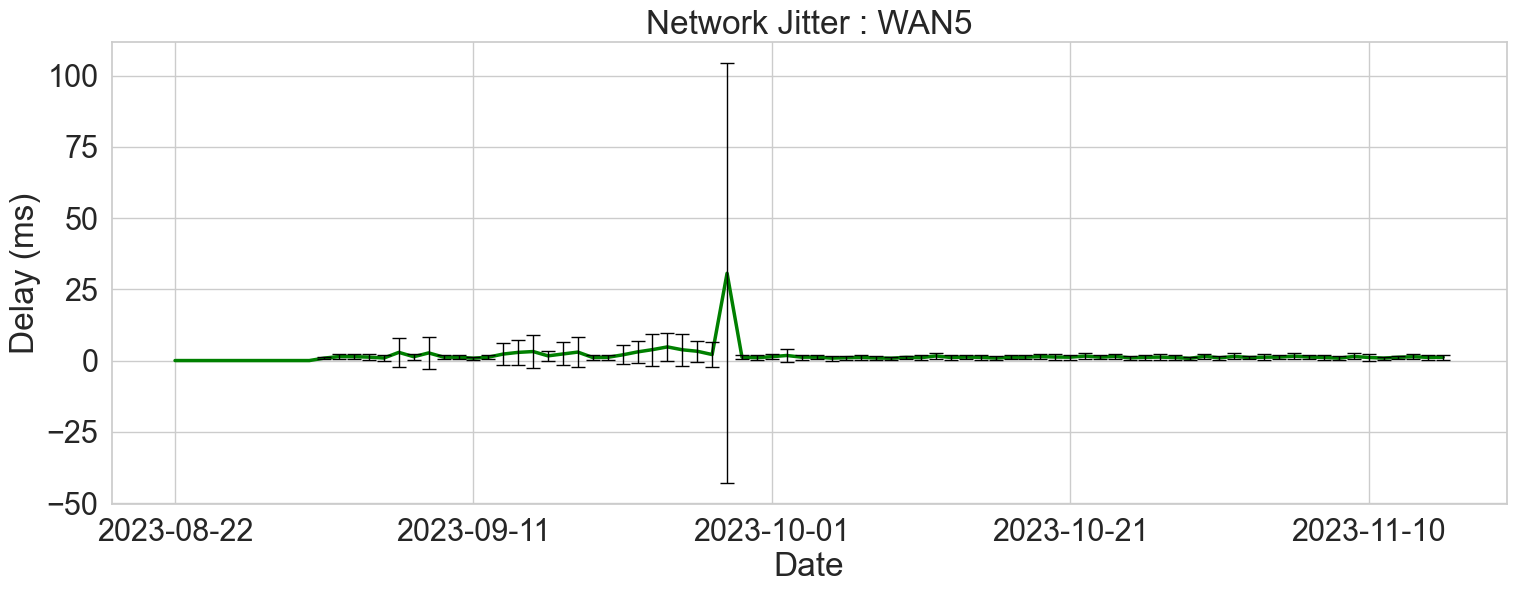

In [10]:
#RIPE Atlas Jitter Graph (works)


measurement_ids = [39019527, 55518116, 58881309]  # Add your desired measurement IDs here
machines = ["WAN1", "WAN3", "WAN5"]
# List of colors for each measurement ID
colors = ['blue', 'red', 'green', 'purple', 'black']

start_date = pd.to_datetime('2023-08-22').date()
end_date = pd.to_datetime('2023-11-15').date()

# Plot the jitter values for each measurement ID
for idx, measurement_id in enumerate(measurement_ids):
    kwargs = {
        "msm_id": measurement_id
    }

    is_success, results = AtlasResultsRequest(**kwargs).create()

    if is_success:
        rtt_values = []
        src_address = []
        timestamps = []
        dst_address = ''
        for result in results:
            timestamp = pd.to_datetime(result['timestamp'], unit='s').date()
            if timestamp >= start_date and timestamp <= end_date:
                timestamps.append(timestamp)
                rtt_values.append(result['avg'])
                src_address.append(result['prb_id'])
                dst_address = result['dst_addr']

        # Combine src_address and rtt_values into pairs
        data = list(zip(src_address, rtt_values, timestamps))

        # Filter out pairs with rtt_value equal to -1
        data = [(src, rtt, time) for src, rtt, time in data if rtt != -1]

        # Unzip the filtered data back into separate lists
        src_address, rtt_values, timestamps = zip(*data)

        #keep track of unique source addresses
        unique_addr = []
        for address in src_address:
            if address not in unique_addr:
                unique_addr.append(address)
        unique_time = []
        for time in timestamps:
            if time not in unique_time:
                unique_time.append(time)

        for address in unique_addr:
            current_data_set = []
            current_time_set = []
            for index in range(0, len(src_address)):
                if src_address[index] == address:
                    current_data_set.append(rtt_values[index])
                    current_time_set.append(timestamps[index])

            rtt_deltas = []  
            standarddev = [] 
            stddev = 0
            for t in unique_time:  
                denominator = 0
                numerator = 0  
                deviation_data = []
                time_dev = []
                for i in range(1, len(current_data_set)):
                    if current_time_set[i] == t:
                        deviation_data.append(abs(current_data_set[i] - current_data_set[i-1]))
                        time_dev.append(t)
                        numerator = numerator + (abs(current_data_set[i] - current_data_set[i-1]))
                        denominator = denominator + 1
                stddev = np.std(deviation_data)
                standarddev.append(stddev)
                if denominator != 0:
                    rtt_deltas.append(numerator/denominator)
                else: 
                    rtt_deltas.append(0)
                                
                            # Calculate the RTT deltas
            # rtt_deltas = [abs(current_data_set[i] - current_data_set[i-1]) for i in range(1, len(current_data_set))]

            # Calculate the average RTT delta (jitter)
            jitter = np.sum(rtt_deltas) / len(rtt_deltas)

            df = pd.DataFrame({'Time': unique_time, 'Delta': rtt_deltas, 'StandardDev': standarddev})
            df['Source'] = address  # Add a column to identify the source address
                
            # Combine all DataFrames into one
            # data_df = pd.concat(data_list)

            # Create the lineplot with error bands using Seaborn
            # plt.figure(figsize=(18, 6))
            # sns.lineplot(x=time_dev, y=deviation_data, label=f"Source {address}", linewidth=0.75, errorbar="sd")
            # sns.lineplot(data=data_df, x='Time', y='Delta', label=f"STDDEV {address}", linewidth=0.0, err_style="bars", ci="sd")

            # Plot the jitter values over time
            plt.figure(figsize=(18, 6))
            #plt.ylim(-10,10)
            #plt.xlim(0,800)
            # Use Seaborn for formatting the line plot
            sns.set(style='whitegrid', font_scale=2)

            sns.lineplot(x=unique_time, y=rtt_deltas, linestyle='-', color=colors[idx], linewidth=2.5)
            
            # Use Matplotlib to add error bars
            plt.errorbar(unique_time, rtt_deltas, yerr=standarddev, fmt='none', elinewidth=1, capsize=5, color="black")

            # Set the x-axis label
            plt.xlabel('Date')
            x_ticks_interval = 20
            plt.xticks(unique_time[::x_ticks_interval])

            # Set the y-axis label
            plt.ylabel('Delay (ms)')

            # Set the title
            plt.title('Network Jitter : ' + machines[idx])

            # Display the legend
            #plt.legend()

            # Display the grid
            plt.grid(True)


    # Show the plot
    plt.show()


In [ ]:
#Command-Line Jitter Graph

import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

colors = ['blue', 'red', 'green', 'purple', 'black']
path = ["LAN1", "LAN2", "LAN3"]
start_date = pd.to_datetime('2023-08-22').date()
end_date = pd.to_datetime('2023-11-15').date()


def plot_ping_jitter(files):
    for idx, file_path in enumerate(files):
        # Read the JSON file
        with open(file_path, 'r') as f:
            data = json.load(f)
        p, (ax1, ax2, ax3) = plt.subplots(ncols=1, nrows=3, sharex=True, figsize=(24,8))


        # Create a DataFrame from the JSON data
        df1 = pd.DataFrame(data)

        # Extract RTT values
        rtt = []
        timestamps = []
        address = None
        for x, row in df1.iterrows():
            timestamp = pd.to_datetime(row['timestamp'], unit='s').date()
            transmissions = df1['ping_data'][x]
            if timestamp >= start_date and timestamp <= end_date:
                for transmission in transmissions:
                    rtt.append(transmission['time'])
                    address = transmission['ip_address']
                    timestamps.append(timestamp)

        # Convert RTT to numpy array
        data = np.array(rtt)
        unique_time = []
        for time in timestamps:
            if time not in unique_time:
                unique_time.append(time)

        # Compute histogram
        rtt_deltas = [abs(rtt[i] - rtt[i-1]) for i in range(1, len(rtt))]

        
        rtt_deltas = []  
        standarddev = [] 
        stddev = 0
        time_dev = []
        for t in unique_time: 
            denominator = 0
            numerator = 0  
            deviation_data = []  
            for i in range(1, len(rtt)):
                if timestamps[i] == t:
                    deviation_data.append(abs(rtt[i] - rtt[i-1]))
                    time_dev.append(t)
                    numerator = numerator + (abs(rtt[i] - rtt[i-1]))
                    denominator = denominator + 1
            stddev = np.std(deviation_data)
            standarddev.append(stddev)
            rtt_deltas.append(numerator/denominator)

        # Calculate the average RTT delta (jitter)
        jitter = np.sum(rtt_deltas) / len(rtt_deltas)

        # Create a list of timestamps (replace with your actual timestamps)
        # timestamps = range(len(rtt))


        # Plot the jitter values over time
        #plt.figure(figsize=(18, 6))
        # plt.ylim(0,5)
        # plt.xlim(0,800)
        # sns.lineplot(x=timestamps[1:], y=rtt_deltas, linestyle='-', color=colors[idx], label=f"Destination {address}", linewidth=0.75)
        #plt.plot(timestamps[1:], rtt_deltas, linestyle='-', color=colors[idx], label=f"Destination {address}", linewidth=0.75)
        #plt.yscale('log')

        sns.set(style='whitegrid', font_scale=3)

        # Use Seaborn for formatting the line plot
        sns.lineplot(x=unique_time, y=rtt_deltas, linestyle='-', linewidth = 2.5, color=colors[idx], ax=ax1)
        ax1.errorbar(unique_time, rtt_deltas, yerr=standarddev, fmt='none', elinewidth=1.5, capsize=5, color="black")

        sns.lineplot(x=unique_time, y=rtt_deltas, linestyle='-', linewidth = 2.5, color=colors[idx], ax=ax2)
        ax2.errorbar(unique_time, rtt_deltas, yerr=standarddev, fmt='none', elinewidth=1.5, capsize=5, color="black")

        sns.lineplot(x=unique_time, y=rtt_deltas, linestyle='-', linewidth = 2.5, color=colors[idx], ax=ax3)
        ax3.errorbar(unique_time, rtt_deltas, yerr=standarddev, fmt='none', elinewidth=1.5, capsize=5, color="black")

        # Use Matplotlib to add error bars

        ax1.set_ylim(2, 400)
        ax2.set_ylim(-2, 2)
        ax3.set_ylim(-200,-2)
        ax1.set_ylabel("")
        ax1.set_xlabel("")
        ax2.set_ylabel("")
        ax2.set_xlabel("")
        ax3.set_ylabel("")
        ax3.set_xlabel("")

        # then, set a new label on the plot (basically just a piece of text) and move it to where it makes sense (requires trial and error)
        p.text(0.40, 0.93, "Network Jitter : " + path[idx], va="center")
        p.text(0.05, 0.50, "Delay (ms)", va="center", rotation="vertical")
        p.text(0.46, 0.00, "Date", va="center")


        # let's put some ticks on the top of the upper part and bottom of the lower part for style
        #ax1.xaxis.tick_top()
        ax1.yaxis.tick_left()

        # finally, adjust everything a bit to make it prettier (this just moves everything, best to try and iterate)
        plt.subplots_adjust(wspace=1, hspace=0)
        # # Set the x-axis label
        # plt.xlabel('Date')

        # # Set the y-axis label
        # plt.ylabel('Delay (ms)')

        # # Set the title
        # plt.title('Network Jitter : ' + path[idx])

        x_ticks_interval = 20
        plt.xticks(unique_time[::x_ticks_interval])


        # # Display the legend
        # #plt.legend()

        # # Display the grid
        # plt.grid(True)
        # #plt.ylim([-4, 5])


    # Show the plot
        plt.show()

# List of file paths
#files = ['ping_data_66.json', 'ping_data_206.json', 'ping_data_192.json']  # Replace with the actual file paths
#files = ['ping-5days-192.111.110.77-data-leo.json', 'ping-5days-206.71.76.62-data-perf.json', 'ping-5days-206.71.76.62-data-leo.json', 'ping-5days-66.99.43.226-data-perf.json','ping-5days-66.99.43.226-data-leo.json','ping-5days-192.111.110.77-data-perf.json' ]
#files = ['local-extern/ping-dtn1-136-118.json', 'local-extern/ping-leo-136-118.json', 'local-extern/ping-pf1-136-118.json']
#files = ['gcp_files/ping-oct5-149.149.2.70.json', "gcp_files/ping-oct5-149.149.248.20.json", "gcp_files/ping-oct5-149.149.248.52.json"]
#files = ['local-extern/ping-leo-136-118-2.json', 'local-extern/ping-pf1-136-118.json', 'local-extern/ping-dtn1-136-118.json']
files = ['lan_files/lan1-ping-new.json', 'lan_files/lan2-ping-new.json', 'lan_files/lan3-ping-new.json']

# Plot Ping RTT for each file
plot_ping_jitter(files)
